In [1]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9622768541613229246
 xla_global_id: -1]

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import itertools
import warnings
warnings.filterwarnings("ignore")


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.optimizers import Adam

import seaborn as sns
import random
import csv

from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler



In [3]:
import numpy as np
import pandas as pd
import pmdarima as pm
from pmdarima import utils
from pmdarima import arima
from pmdarima import model_selection
from tensorflow.keras.layers import LSTM

import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from matplotlib import pyplot as plt

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, ReLU, PReLU
from keras_tuner.tuners import RandomSearch

from sklearn.metrics import mean_absolute_percentage_error

Using TensorFlow backend


In [5]:
df=pd.read_csv('icecream_sales_date 2009-2022.csv', index_col='date', parse_dates=True,encoding="utf-8")
df.head()

,sales,tokyo_temperature,holiday,Unnamed: 4,temperature_difference_2009_2018,temperature_difference_2019_2021,Unnamed: 7,2009,2010,2011,...,2015,2016,2017,2018,2019,2020,2021,2022,AVERAGE2009-2018,AVERAGE2019-2021
date,,,,,,,,,,,,,,,,,,,,,
2009-01-01,17.59,10.6,1,NaN,0.521429,0.033333,1.0,10.2,11.0,9.1,...,10.4,10.6,10.8,9.4,10.3,11.1,10.3,9.4,10.078571,10.566667
2009-01-02,23.83,11.6,1,NaN,1.521429,1.033333,2.0,11.5,9.9,11.2,...,10.4,12.2,12.1,10.1,11.6,13.3,14.0,10.5,11.142857,12.966667
2009-01-03,22.94,10.7,1,NaN,0.621429,0.133333,3.0,13.7,13.2,12.3,...,15.5,14.9,13.4,16.9,15.4,16.0,17.9,16.6,14.942857,16.433333
2009-01-04,17.14,11.1,1,NaN,1.021429,0.533333,4.0,20.2,16.6,18.9,...,19.3,20.3,19.9,22.1,19.0,18.2,20.6,20.2,19.471429,19.266667
2009-01-05,10.32,11.8,0,NaN,1.721429,1.233333,5.0,23.6,23.0,22.2,...,26.4,25.2,25.1,24.6,25.3,24.0,24.1,23.5,24.242857,24.466667


In [6]:
df_train=df[:"2018-12-31"]
df_test=df["2019-01-01":"2019-12-31"]

In [7]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)



In [8]:
dfs=df_train
dfr=df_train
dft=df_train
dfo=df_train
dfs.head()

,sales,tokyo_temperature,holiday,Unnamed: 4,temperature_difference_2009_2018,temperature_difference_2019_2021,Unnamed: 7,2009,2010,2011,...,2015,2016,2017,2018,2019,2020,2021,2022,AVERAGE2009-2018,AVERAGE2019-2021
date,,,,,,,,,,,,,,,,,,,,,
2009-01-01,17.59,10.6,1,NaN,0.521429,0.033333,1.0,10.2,11.0,9.1,...,10.4,10.6,10.8,9.4,10.3,11.1,10.3,9.4,10.078571,10.566667
2009-01-02,23.83,11.6,1,NaN,1.521429,1.033333,2.0,11.5,9.9,11.2,...,10.4,12.2,12.1,10.1,11.6,13.3,14.0,10.5,11.142857,12.966667
2009-01-03,22.94,10.7,1,NaN,0.621429,0.133333,3.0,13.7,13.2,12.3,...,15.5,14.9,13.4,16.9,15.4,16.0,17.9,16.6,14.942857,16.433333
2009-01-04,17.14,11.1,1,NaN,1.021429,0.533333,4.0,20.2,16.6,18.9,...,19.3,20.3,19.9,22.1,19.0,18.2,20.6,20.2,19.471429,19.266667
2009-01-05,10.32,11.8,0,NaN,1.721429,1.233333,5.0,23.6,23.0,22.2,...,26.4,25.2,25.1,24.6,25.3,24.0,24.1,23.5,24.242857,24.466667


In [9]:
%load_ext rpy2.ipython

In [10]:
%%R
table <- read.csv('icecream_sales_date 2009-2022.csv')
table

           date sales tokyo_temperature holiday  X
1      2009/1/1 17.59              10.6       1 NA
2      2009/1/2 23.83              11.6       1 NA
3      2009/1/3 22.94              10.7       1 NA
4      2009/1/4 17.14              11.1       1 NA
5      2009/1/5 10.32              11.8       0 NA
6      2009/1/6 10.75              12.5       0 NA
7      2009/1/7 10.57               9.1       0 NA
8      2009/1/8  9.17               9.8       0 NA
9      2009/1/9  8.20               6.8       0 NA
10    2009/1/10 12.31              10.8       1 NA
11    2009/1/11 13.75               7.9       1 NA
12    2009/1/12 12.13               8.4       1 NA
13    2009/1/13  7.69              10.3       0 NA
14    2009/1/14  6.49               9.8       0 NA
15    2009/1/15  5.30               7.6       0 NA
16    2009/1/16  7.62               9.0       0 NA
17    2009/1/17 13.79              11.6       1 NA
18    2009/1/18 16.08               8.3       1 NA
19    2009/1/19  6.73          

160    2009/6/9 22.03              24.3       0 NA
161   2009/6/10 18.55              25.9       0 NA
162   2009/6/11 19.39              25.0       0 NA
163   2009/6/12 24.47              28.1       0 NA
164   2009/6/13 37.77              26.8       1 NA
165   2009/6/14 36.92              23.9       1 NA
166   2009/6/15 16.98              23.9       0 NA
167   2009/6/16 22.45              23.3       0 NA
168   2009/6/17 25.26              24.6       0 NA
169   2009/6/18 23.53              24.1       0 NA
170   2009/6/19 26.50              26.7       0 NA
171   2009/6/20 41.07              27.6       1 NA
172   2009/6/21 36.51              24.0       1 NA
173   2009/6/22 23.12              24.9       0 NA
174   2009/6/23 32.51              29.7       0 NA
175   2009/6/24 24.44              26.9       0 NA
176   2009/6/25 31.37              28.2       0 NA
177   2009/6/26 31.51              31.9       0 NA
178   2009/6/27 49.42              31.8       1 NA
179   2009/6/28 39.30          

320  2009/11/16 12.26              17.4       0 NA
321  2009/11/17  7.79              12.7       0 NA
322  2009/11/18  7.63              14.9       0 NA
323  2009/11/19 11.80               9.4       0 NA
324  2009/11/20 10.21              14.5       0 NA
325  2009/11/21 14.66              17.5       1 NA
326  2009/11/22 17.47              10.2       1 NA
327  2009/11/23 12.71              15.7       1 NA
328  2009/11/24  9.19              14.0       0 NA
329  2009/11/25 11.37              16.6       0 NA
330  2009/11/26 10.71              18.1       0 NA
331  2009/11/27 12.52              18.0       0 NA
332  2009/11/28 16.35              17.7       1 NA
333  2009/11/29 15.30              12.9       1 NA
334  2009/11/30 11.16              11.7       0 NA
335   2009/12/1 12.45              14.7       0 NA
336   2009/12/2 13.76              16.2       0 NA
337   2009/12/3  6.69              11.8       0 NA
338   2009/12/4 10.47              14.9       0 NA
339   2009/12/5 15.45          

480   2010/4/25 26.19              16.7       1 NA
481   2010/4/26 13.43              19.9       0 NA
482   2010/4/27 12.16              15.7       0 NA
483   2010/4/28 13.74              15.4       0 NA
484   2010/4/29 24.94              23.4       1 NA
485   2010/4/30 15.48              20.0       0 NA
486    2010/5/1 29.79              20.1       1 NA
487    2010/5/2 48.82              22.1       1 NA
488    2010/5/3 40.92              24.0       1 NA
489    2010/5/4 50.82              24.7       1 NA
490    2010/5/5 42.26              27.6       1 NA
491    2010/5/6 19.76              27.8       0 NA
492    2010/5/7 17.16              22.3       0 NA
493    2010/5/8 30.16              23.7       1 NA
494    2010/5/9 38.96              26.6       1 NA
495   2010/5/10 13.09              22.5       0 NA
496   2010/5/11 10.14              19.7       0 NA
497   2010/5/12 13.59              21.8       0 NA
498   2010/5/13 14.35              20.9       0 NA
499   2010/5/14 15.16          

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 2010/11/12  9.49              20.6       0 NA
682  2010/11/13 13.79              19.0       1 NA
683  2010/11/14 16.69              18.4       1 NA
684  2010/11/15  7.60              16.0       0 NA
685  2010/11/16  9.99              12.9       0 NA
686  2010/11/17 10.16              11.2       0 NA
687  2010/11/18  9.70              14.9       0 NA
688  2010/11/19  9.67              15.6       0 NA
689  2010/11/20 17.34              16.7       1 NA
690  2010/11/21 15.18              17.0       1 NA
691  2010/11/22 10.14              15.5       0 NA
692  2010/11/23 16.63              17.3       1 NA
693  2010/11/24 10.60              14.3       0 NA
694  2010/11/25  9.44              14.1       0 NA
695  2010/11/26  8.21              16.0       0 NA
696  2010/11/27 15.64              14.5       1 NA
697  2010/11/28 14.94              19.7       1 NA
698  2010/11/29  7.04              16.0       0 NA
699  2010/11/30  7.43              15.3       0 NA
700   2010/12/1 13.34              

841   2011/4/21 11.10              16.2       0 NA
842   2011/4/22 11.46              18.8       0 NA
843   2011/4/23 18.73              17.9       1 NA
844   2011/4/24 20.64              20.0       1 NA
845   2011/4/25 12.24              20.1       0 NA
846   2011/4/26 12.99              21.0       0 NA
847   2011/4/27 11.20              24.4       0 NA
848   2011/4/28 14.98              24.8       0 NA
849   2011/4/29 26.78              19.1       1 NA
850   2011/4/30 26.86              22.2       1 NA
851    2011/5/1 27.48              21.1       1 NA
852    2011/5/2 26.18              24.2       0 NA
853    2011/5/3 24.59              18.2       1 NA
854    2011/5/4 37.95              21.7       1 NA
855    2011/5/5 29.89              17.2       1 NA
856    2011/5/6 16.01              19.6       0 NA
857    2011/5/7 27.54              18.4       1 NA
858    2011/5/8 38.49              25.9       1 NA
859    2011/5/9 17.88              23.8       0 NA
860   2011/5/10 14.73          

1001  2011/9/28 18.94              24.3       0 NA
1002  2011/9/29 16.79              25.7       0 NA
1003  2011/9/30 14.66              29.6       0 NA
1004  2011/10/1 25.22              25.1       1 NA
1005  2011/10/2 22.79              20.1       1 NA
1006  2011/10/3 13.65              22.9       0 NA
1007  2011/10/4 11.35              22.2       0 NA
1008  2011/10/5  8.34              19.0       0 NA
1009  2011/10/6 15.65              25.5       0 NA
1010  2011/10/7 16.47              25.6       0 NA
1011  2011/10/8 26.24              23.2       1 NA
1012  2011/10/9 31.32              22.8       1 NA
1013 2011/10/10 22.93              24.3       1 NA
1014 2011/10/11 14.13              25.2       0 NA
1015 2011/10/12 14.30              23.4       0 NA
1016 2011/10/13 14.91              23.7       0 NA
1017 2011/10/14 13.21              25.4       0 NA
1018 2011/10/15 18.24              26.9       1 NA
1019 2011/10/16 25.70              29.7       1 NA
1020 2011/10/17 16.18          

1161   2012/3/7 10.83              15.7       0 NA
1162   2012/3/8 10.53              11.1       0 NA
1163   2012/3/9  7.77               9.7       0 NA
1164  2012/3/10 13.53               7.6       1 NA
1165  2012/3/11 15.64              11.1       1 NA
1166  2012/3/12  9.46              12.6       0 NA
1167  2012/3/13  8.80              10.7       0 NA
1168  2012/3/14 11.39              10.4       0 NA
1169  2012/3/15  7.51              13.6       0 NA
1170  2012/3/16  8.23              11.1       0 NA
1171  2012/3/17 15.40              10.3       1 NA
1172  2012/3/18 16.85              11.8       1 NA
1173  2012/3/19  9.32              12.2       0 NA
1174  2012/3/20 13.67              12.1       1 NA
1175  2012/3/21 11.20              11.6       0 NA
1176  2012/3/22 11.11              14.8       0 NA
1177  2012/3/23 10.42              12.2       0 NA
1178  2012/3/24 19.90              11.6       1 NA
1179  2012/3/25 19.41              13.8       1 NA
1180  2012/3/26 13.06          

1321  2012/8/14 45.76              30.6       1 NA
1322  2012/8/15 48.02              33.4       1 NA
1323  2012/8/16 47.29              34.5       1 NA
1324  2012/8/17 39.17              35.7       0 NA
1325  2012/8/18 38.37              30.8       1 NA
1326  2012/8/19 51.46              33.1       1 NA
1327  2012/8/20 36.85              33.0       0 NA
1328  2012/8/21 36.91              34.0       0 NA
1329  2012/8/22 38.91              33.5       0 NA
1330  2012/8/23 38.90              34.2       0 NA
1331  2012/8/24 34.99              35.2       0 NA
1332  2012/8/25 51.47              34.4       1 NA
1333  2012/8/26 50.31              34.8       1 NA
1334  2012/8/27 33.07              35.0       0 NA
1335  2012/8/28 36.70              33.8       0 NA
1336  2012/8/29 37.10              32.5       0 NA
1337  2012/8/30 35.83              35.6       0 NA
1338  2012/8/31 36.10              33.8       0 NA
1339   2012/9/1 44.50              31.4       1 NA
1340   2012/9/2 39.52          

1481  2013/1/21  7.70               9.4       0 NA
1482  2013/1/22  8.43               9.3       0 NA
1483  2013/1/23 10.95               9.5       0 NA
1484  2013/1/24  8.81               9.8       0 NA
1485  2013/1/25 10.69              13.4       0 NA
1486  2013/1/26 11.01               7.4       1 NA
1487  2013/1/27 14.00               9.4       1 NA
1488  2013/1/28  7.19              10.5       0 NA
1489  2013/1/29  8.93              12.4       0 NA
1490  2013/1/30 10.73              13.6       0 NA
1491  2013/1/31  8.63               9.6       0 NA
1492   2013/2/1 11.16              12.6       0 NA
1493   2013/2/2 18.69              20.9       1 NA
1494   2013/2/3 18.59              13.2       1 NA
1495   2013/2/4  9.77              14.8       0 NA
1496   2013/2/5 11.12              12.4       0 NA
1497   2013/2/6  8.38               9.0       0 NA
1498   2013/2/7  9.44              12.7       0 NA
1499   2013/2/8 10.36               7.1       0 NA
1500   2013/2/9 15.50          

1641  2013/6/30 39.30              27.8       1 NA
1642   2013/7/1 28.93              26.1       0 NA
1643   2013/7/2 35.16              27.9       0 NA
1644   2013/7/3 24.28              27.4       0 NA
1645   2013/7/4 25.82              27.3       0 NA
1646   2013/7/5 27.52              28.9       0 NA
1647   2013/7/6 50.57              33.7       1 NA
1648   2013/7/7 56.02              35.4       1 NA
1649   2013/7/8 34.51              35.3       0 NA
1650   2013/7/9 43.24              35.4       0 NA
1651  2013/7/10 40.96              35.3       0 NA
1652  2013/7/11 40.67              34.5       0 NA
1653  2013/7/12 44.51              34.9       0 NA
1654  2013/7/13 48.66              34.4       1 NA
1655  2013/7/14 54.29              34.6       1 NA
1656  2013/7/15 47.82              35.1       1 NA
1657  2013/7/16 38.88              29.1       0 NA
1658  2013/7/17 30.75              29.1       0 NA
1659  2013/7/18 37.62              31.8       0 NA
1660  2013/7/19 34.22          

1801  2013/12/7 13.73              14.6       1 NA
1802  2013/12/8 16.05              11.2       1 NA
1803  2013/12/9  8.40              11.0       0 NA
1804 2013/12/10  9.53              14.1       0 NA
1805 2013/12/11  9.35              12.8       0 NA
1806 2013/12/12  9.02              13.2       0 NA
1807 2013/12/13 10.51              14.9       0 NA
1808 2013/12/14 14.74              11.2       1 NA
1809 2013/12/15 14.21              11.4       1 NA
1810 2013/12/16 13.33              11.9       0 NA
1811 2013/12/17 12.74              12.0       0 NA
1812 2013/12/18 10.75               8.8       0 NA
1813 2013/12/19  9.43               7.6       0 NA
1814 2013/12/20 12.22               9.4       0 NA
1815 2013/12/21 20.06              11.0       1 NA
1816 2013/12/22 16.42              11.4       1 NA
1817 2013/12/23 22.78               8.4       1 NA
1818 2013/12/24 21.36              12.5       0 NA
1819 2013/12/25 11.42              10.3       0 NA
1820 2013/12/26  9.96          

1961  2014/5/16 19.43              25.7       0 NA
1962  2014/5/17 34.78              26.2       1 NA
1963  2014/5/18 36.61              25.2       1 NA
1964  2014/5/19 18.91              25.7       0 NA
1965  2014/5/20 19.20              25.6       0 NA
1966  2014/5/21 20.24              19.5       0 NA
1967  2014/5/22 16.21              22.8       0 NA
1968  2014/5/23 21.52              21.7       0 NA
1969  2014/5/24 36.18              25.4       1 NA
1970  2014/5/25 38.58              27.3       1 NA
1971  2014/5/26 16.52              24.6       0 NA
1972  2014/5/27 20.41              26.5       0 NA
1973  2014/5/28 21.50              27.7       0 NA
1974  2014/5/29 29.92              27.5       0 NA
1975  2014/5/30 29.32              29.0       0 NA
1976  2014/5/31 45.73              31.6       1 NA
1977   2014/6/1 53.73              33.1       1 NA
1978   2014/6/2 31.35              31.4       0 NA
1979   2014/6/3 26.63              28.9       0 NA
1980   2014/6/4 23.70          

2121 2014/10/23 13.17              15.5       0 NA
2122 2014/10/24 14.55              20.7       0 NA
2123 2014/10/25 28.16              22.7       1 NA
2124 2014/10/26 26.44              23.9       1 NA
2125 2014/10/27 12.75              23.0       0 NA
2126 2014/10/28 12.18              20.2       0 NA
2127 2014/10/29 12.77              21.6       0 NA
2128 2014/10/30 14.38              21.8       0 NA
2129 2014/10/31 14.59              20.8       0 NA
2130  2014/11/1 20.41              18.6       1 NA
2131  2014/11/2 22.82              22.4       1 NA
2132  2014/11/3 18.46              21.6       1 NA
2133  2014/11/4 11.20              19.9       0 NA
2134  2014/11/5 11.57              17.6       0 NA
2135  2014/11/6  9.63              21.3       0 NA
2136  2014/11/7 12.97              21.1       0 NA
2137  2014/11/8 17.37              15.4       1 NA
2138  2014/11/9 18.79              17.6       1 NA
2139 2014/11/10 12.23              22.2       0 NA
2140 2014/11/11  9.82          

2281   2015/4/1 17.66              18.7       0 NA
2282   2015/4/2 15.85              17.4       0 NA
2283   2015/4/3 13.46              20.6       0 NA
2284   2015/4/4 26.60              19.1       1 NA
2285   2015/4/5 17.90              11.4       1 NA
2286   2015/4/6 13.29              22.9       0 NA
2287   2015/4/7 11.72              13.0       0 NA
2288   2015/4/8 10.05               7.6       0 NA
2289   2015/4/9 14.89              13.2       0 NA
2290  2015/4/10 12.27              12.1       0 NA
2291  2015/4/11 21.27              16.2       1 NA
2292  2015/4/12 25.16              18.0       1 NA
2293  2015/4/13  9.67              11.3       0 NA
2294  2015/4/14  9.70              14.1       0 NA
2295  2015/4/15 13.78              21.4       0 NA
2296  2015/4/16 15.07              21.5       0 NA
2297  2015/4/17 18.59              24.9       0 NA
2298  2015/4/18 25.06              19.7       1 NA
2299  2015/4/19 24.79              17.2       1 NA
2300  2015/4/20 15.06          

2441   2015/9/8 16.39              21.0       0 NA
2442   2015/9/9 17.19              25.3       0 NA
2443  2015/9/10 20.55              23.5       0 NA
2444  2015/9/11 23.53              29.3       0 NA
2445  2015/9/12 35.90              29.5       1 NA
2446  2015/9/13 32.50              27.5       1 NA
2447  2015/9/14 18.71              27.3       0 NA
2448  2015/9/15 18.44              27.5       0 NA
2449  2015/9/16 19.04              25.2       0 NA
2450  2015/9/17 17.15              18.9       0 NA
2451  2015/9/18 23.80              23.9       0 NA
2452  2015/9/19 31.77              29.3       1 NA
2453  2015/9/20 40.82              28.4       1 NA
2454  2015/9/21 36.87              27.5       1 NA
2455  2015/9/22 38.61              28.5       1 NA
2456  2015/9/23 36.85              27.2       1 NA
2457  2015/9/24 16.47              23.0       0 NA
2458  2015/9/25 16.24              19.5       0 NA
2459  2015/9/26 25.45              24.6       1 NA
2460  2015/9/27 34.42          

2601  2016/2/15  8.76              15.5       0 NA
2602  2016/2/16 12.64              10.0       0 NA
2603  2016/2/17 10.46              13.4       0 NA
2604  2016/2/18 11.70              10.7       0 NA
2605  2016/2/19 11.84              16.5       0 NA
2606  2016/2/20 21.83              11.2       1 NA
2607  2016/2/21 19.51              15.7       1 NA
2608  2016/2/22 10.48               9.8       0 NA
2609  2016/2/23 11.62              10.0       0 NA
2610  2016/2/24 11.45               7.7       0 NA
2611  2016/2/25 12.18               8.4       0 NA
2612  2016/2/26 10.12              11.4       0 NA
2613  2016/2/27 15.13              12.5       1 NA
2614  2016/2/28 22.44              15.0       1 NA
2615   2016/3/1 11.92              10.3       0 NA
2616   2016/3/2 16.15              12.4       0 NA
2617   2016/3/3 15.32              16.4       0 NA
2618   2016/3/4 13.18              15.9       0 NA
2619   2016/3/5 23.54              16.3       1 NA
2620   2016/3/6 19.38          

3452  2018/6/16 41.55              18.4       1 NA
3453  2018/6/17 42.72              22.5       1 NA
3454  2018/6/18 20.04              21.2       0 NA
3455  2018/6/19 28.05              28.8       0 NA
3456  2018/6/20 26.99              21.7       0 NA
3457  2018/6/21 28.43              24.4       0 NA
3458  2018/6/22 33.85              28.1       0 NA
3459  2018/6/23 37.37              23.0       1 NA
3460  2018/6/24 50.99              27.0       1 NA
3461  2018/6/25 32.89              32.6       0 NA
3462  2018/6/26 34.45              30.1       0 NA
3463  2018/6/27 36.45              31.7       0 NA
3464  2018/6/28 35.43              31.9       0 NA
3465  2018/6/29 38.00              32.9       0 NA
3466  2018/6/30 52.57              32.7       1 NA
3467   2018/7/1 59.26              32.0       1 NA
3468   2018/7/2 44.04              33.5       0 NA
3469   2018/7/3 37.68              32.7       0 NA
3470   2018/7/4 38.06              31.2       0 NA
3471   2018/7/5 34.23          

3612 2018/11/23 20.04              15.3       1 NA
3613 2018/11/24 16.44              12.1       1 NA
3614 2018/11/25 19.07              14.5       1 NA
3615 2018/11/26 13.45              17.7       0 NA
3616 2018/11/27 11.73              17.9       0 NA
3617 2018/11/28 14.39              18.1       0 NA
3618 2018/11/29 13.71              15.3       0 NA
3619 2018/11/30 15.90              16.0       0 NA
3620  2018/12/1 19.48              17.2       1 NA
3621  2018/12/2 23.97              11.6       1 NA
3622  2018/12/3 10.84              17.0       0 NA
3623  2018/12/4 14.91              23.4       0 NA
3624  2018/12/5 12.33              20.2       0 NA
3625  2018/12/6 11.58              13.2       0 NA
3626  2018/12/7 10.71              16.4       0 NA
3627  2018/12/8 20.39              12.2       1 NA
3628  2018/12/9 15.75              10.5       1 NA
3629 2018/12/10 10.59               8.4       0 NA
3630 2018/12/11 12.18               7.3       0 NA
3631 2018/12/12 14.13          

3772   2019/5/2 39.26              23.9       0 NA
3773   2019/5/3 44.98              25.0       1 NA
3774   2019/5/4 43.54              24.8       1 NA
3775   2019/5/5 52.20              25.2       1 NA
3776   2019/5/6 29.27              22.1       1 NA
3777   2019/5/7 17.04              20.9       0 NA
3778   2019/5/8 23.04              22.7       0 NA
3779   2019/5/9 19.02              22.7       0 NA
3780  2019/5/10 27.26              27.1       0 NA
3781  2019/5/11 41.68              27.8       1 NA
3782  2019/5/12 38.40              22.2       1 NA
3783  2019/5/13 20.51              22.6       0 NA
3784  2019/5/14 19.75              19.3       0 NA
3785  2019/5/15 25.60              23.8       0 NA
3786  2019/5/16 29.10              24.6       0 NA
3787  2019/5/17 29.22              25.9       0 NA
3788  2019/5/18 35.56              25.6       1 NA
3789  2019/5/19 41.75              25.2       1 NA
3790  2019/5/20 22.66              25.0       0 NA
3791  2019/5/21 19.59          

3932  2019/10/9 24.57              25.1       0 NA
3933 2019/10/10 26.08              25.2       0 NA
3934 2019/10/11 27.24              21.7       0 NA
3935 2019/10/12 14.74              25.2       1 NA
3936 2019/10/13 32.32              28.5       1 NA
3937 2019/10/14 26.28              20.2       1 NA
3938 2019/10/15 17.08              23.0       0 NA
3939 2019/10/16 20.09              18.5       0 NA
3940 2019/10/17 18.38              18.4       0 NA
3941 2019/10/18 16.86              19.5       0 NA
3942 2019/10/19 22.16              20.2       1 NA
3943 2019/10/20 36.96              23.9       1 NA
3944 2019/10/21 17.07              21.3       0 NA
3945 2019/10/22 25.53              17.2       1 NA
3946 2019/10/23 17.61              24.8       0 NA
3947 2019/10/24 17.79              21.0       0 NA
3948 2019/10/25 17.11              16.3       0 NA
3949 2019/10/26 30.20              24.5       1 NA
3950 2019/10/27 30.90              22.5       1 NA
3951 2019/10/28 20.14          

4092  2020/3/18 18.52              18.4       0 NA
4093  2020/3/19 21.97              22.0       0 NA
4094  2020/3/20 22.72              19.4       1 NA
4095  2020/3/21 26.79              21.0       1 NA
4096  2020/3/22 26.08              23.7       1 NA
4097  2020/3/23 16.13              14.0       0 NA
4098  2020/3/24 20.03              12.6       0 NA
4099  2020/3/25 23.25              16.0       0 NA
4100  2020/3/26 21.20              20.0       0 NA
4101  2020/3/27 18.14              22.8       0 NA
4102  2020/3/28 24.12              24.6       1 NA
4103  2020/3/29 20.39               7.7       1 NA
4104  2020/3/30 18.33              10.3       0 NA
4105  2020/3/31 17.87              12.5       0 NA
4106   2020/4/1 14.47              12.9       0 NA
4107   2020/4/2 19.17              19.4       0 NA
4108   2020/4/3 16.27              18.2       0 NA
4109   2020/4/4 31.98              22.3       1 NA
4110   2020/4/5 25.72              15.9       1 NA
4111   2020/4/6 22.29          

58                        -5.84285714                    -7.666667e+00  NA
59                        -0.84285714                    -2.666667e+00  NA
60                        -5.94285714                    -7.433333e+00  NA
61                        -4.34285714                    -5.833333e+00  NA
62                        -8.94285714                    -1.043333e+01  NA
63                        -5.74285714                    -7.233333e+00  NA
64                        -3.04285714                    -4.533333e+00  NA
65                        -2.34285714                    -3.833333e+00  NA
66                        -0.24285714                    -1.733333e+00  NA
67                        -5.14285714                    -6.633333e+00  NA
68                        -2.24285714                    -3.733333e+00  NA
69                         2.65714286                     1.166667e+00  NA
70                        -3.34285714                    -4.833333e+00  NA
71                       

167                       -3.22857143                    -3.566667e+00  NA
168                       -1.92857143                    -2.266667e+00  NA
169                       -2.42857143                    -2.766667e+00  NA
170                        0.17142857                    -1.666667e-01  NA
171                        1.07142857                     7.333333e-01  NA
172                       -2.52857143                    -2.866667e+00  NA
173                       -1.62857143                    -1.966667e+00  NA
174                        3.17142857                     2.833333e+00  NA
175                        0.37142857                     3.333333e-02  NA
176                        1.67142857                     1.333333e+00  NA
177                        5.37142857                     5.033333e+00  NA
178                        5.27142857                     4.933333e+00  NA
179                       -0.92857143                    -1.266667e+00  NA
180                      

276                        2.71428571                     2.633333e+00  NA
277                        3.41428571                     3.333333e+00  NA
278                       -1.28571429                    -1.366667e+00  NA
279                       -3.38571429                    -3.466667e+00  NA
280                       -4.18571429                    -4.266667e+00  NA
281                        3.91428571                     3.833333e+00  NA
282                        1.51428571                     1.433333e+00  NA
283                       -2.58571429                    -2.666667e+00  NA
284                        1.41428571                     1.333333e+00  NA
285                       -0.58571429                    -6.666667e-01  NA
286                        2.51428571                     2.433333e+00  NA
287                       -1.58571429                    -1.666667e+00  NA
288                       -0.58571429                    -6.666667e-01  NA
289                      

385                        7.22142857                     6.733333e+00  NA
386                        7.92142857                     7.433333e+00  NA
387                        0.42142857                    -6.666667e-02  NA
388                        0.02142857                    -4.666667e-01  NA
389                        0.72142857                     2.333333e-01  NA
390                        4.62142857                     4.133333e+00  NA
391                        0.42142857                    -6.666667e-02  NA
392                        2.62142857                     2.133333e+00  NA
393                        5.42142857                     4.933333e+00  NA
394                        1.52142857                     1.033333e+00  NA
395                        2.92142857                     2.433333e+00  NA
396                        2.32142857                     1.833333e+00  NA
397                       -1.74285714                    -3.566667e+00  NA
398                      

1624                      -3.77142857                    -4.366667e+00  NA
1625                       0.72857143                     1.333333e-01  NA
1626                       3.62857143                     3.033333e+00  NA
1627                      -1.07142857                    -1.666667e+00  NA
1628                       3.02857143                     2.433333e+00  NA
1629                       3.92857143                     3.333333e+00  NA
1630                       1.72857143                     1.133333e+00  NA
1631                      -1.97142857                    -2.566667e+00  NA
1632                      -2.27142857                    -2.866667e+00  NA
1633                       0.12857143                    -4.666667e-01  NA
1634                       1.62857143                     1.033333e+00  NA
1635                       1.42857143                     8.333333e-01  NA
1636                       0.02857143                    -5.666667e-01  NA
1637                     

1733                      -1.37142857                    -1.700000e+00  NA
1734                       1.41428571                     1.433333e+00  NA
1735                       3.91428571                     3.933333e+00  NA
1736                       6.31428571                     6.333333e+00  NA
1737                      -1.98571429                    -1.966667e+00  NA
1738                      -3.18571429                    -3.166667e+00  NA
1739                       1.81428571                     1.833333e+00  NA
1740                       4.61428571                     4.633333e+00  NA
1741                       7.11428571                     7.133333e+00  NA
1742                       6.31428571                     6.333333e+00  NA
1743                       5.91428571                     5.933333e+00  NA
1744                       7.71428571                     7.733333e+00  NA
1745                       8.81428571                     8.833333e+00  NA
1746                     

1842                      -0.45714286                    -1.066667e+00  NA
1843                      -1.35714286                    -1.966667e+00  NA
1844                      -2.85714286                    -3.466667e+00  NA
1845                      -1.45714286                    -2.066667e+00  NA
1846                       1.84285714                     1.233333e+00  NA
1847                      -0.35714286                    -9.666667e-01  NA
1848                       1.14285714                     5.333333e-01  NA
1849                       2.64285714                     2.033333e+00  NA
1850                       2.44285714                     1.833333e+00  NA
1851                       4.54285714                     3.933333e+00  NA
1852                      -2.45714286                    -3.066667e+00  NA
1853                       5.04285714                     4.433333e+00  NA
1854                       2.84285714                     2.233333e+00  NA
1855                     

1951                      -6.81428571                    -6.466667e+00  NA
1952                      -3.31428571                    -2.966667e+00  NA
1953                      -3.31428571                    -2.966667e+00  NA
1954                       1.98571429                     2.333333e+00  NA
1955                       0.08571429                     4.333333e-01  NA
1956                       0.48571429                     8.333333e-01  NA
1957                      -1.51428571                    -1.166667e+00  NA
1958                      -2.11428571                    -1.766667e+00  NA
1959                       2.38571429                     2.733333e+00  NA
1960                      -2.91428571                    -2.566667e+00  NA
1961                       0.88571429                     1.233333e+00  NA
1962                       1.38571429                     1.733333e+00  NA
1963                       0.38571429                     7.333333e-01  NA
1964                     

2060                      -1.48571429                    -2.533333e+00  NA
2061                       0.31428571                    -7.333333e-01  NA
2062                      -2.48571429                    -3.533333e+00  NA
2063                      -4.88571429                    -5.933333e+00  NA
2064                      -8.38571429                    -9.433333e+00  NA
2065                      -8.78571429                    -9.833333e+00  NA
2066                      -5.58571429                    -6.633333e+00  NA
2067                      -5.68571429                    -6.733333e+00  NA
2068                      -6.08571429                    -7.133333e+00  NA
2069                      -3.77142857                    -4.100000e+00  NA
2070                       2.22857143                     1.900000e+00  NA
2071                      -0.27142857                    -6.000000e-01  NA
2072                       0.12857143                    -2.000000e-01  NA
2073                     

2169                      -1.30000000                    -1.666667e+00  NA
2170                       4.10000000                     3.733333e+00  NA
2171                      -1.00000000                    -1.366667e+00  NA
2172                       0.60000000                     2.333333e-01  NA
2173                      -3.20000000                    -3.566667e+00  NA
2174                      -1.70000000                    -2.066667e+00  NA
2175                      -6.80000000                    -7.166667e+00  NA
2176                      -3.00000000                    -3.366667e+00  NA
2177                      -3.80000000                    -4.166667e+00  NA
2178                      -2.60000000                    -2.966667e+00  NA
2179                      -4.50000000                    -4.866667e+00  NA
2180                       0.50000000                     1.333333e-01  NA
2181                      -0.70000000                    -1.066667e+00  NA
2182                     

2278                       6.22857143                     4.666667e+00  NA
2279                       8.72857143                     7.166667e+00  NA
2280                       8.32857143                     6.766667e+00  NA
2281                      -1.14285714                    -5.666667e-01  NA
2282                      -2.44285714                    -1.866667e+00  NA
2283                       0.75714286                     1.333333e+00  NA
2284                      -0.74285714                    -1.666667e-01  NA
2285                      -8.44285714                    -7.866667e+00  NA
2286                       3.05714286                     3.633333e+00  NA
2287                      -6.84285714                    -6.266667e+00  NA
2288                     -12.24285714                    -1.166667e+01  NA
2289                      -6.64285714                    -6.066667e+00  NA
2290                      -7.74285714                    -7.166667e+00  NA
2291                     

2387                      -2.00000000                     4.000000e-01  NA
2388                      -0.50000000                     1.900000e+00  NA
2389                      -1.00000000                     1.400000e+00  NA
2390                       3.90000000                     6.300000e+00  NA
2391                       2.60000000                     5.000000e+00  NA
2392                       4.00000000                     6.400000e+00  NA
2393                       1.90000000                     4.300000e+00  NA
2394                      -0.50000000                     1.900000e+00  NA
2395                       3.00000000                     5.400000e+00  NA
2396                       2.20000000                     4.600000e+00  NA
2397                       4.90000000                     7.300000e+00  NA
2398                       4.10000000                     6.500000e+00  NA
2399                       3.20000000                     5.600000e+00  NA
2400                     

2496                      -1.65714286                    -3.000000e+00  NA
2497                       4.34285714                     3.000000e+00  NA
2498                       3.14285714                     1.800000e+00  NA
2499                       4.14285714                     2.800000e+00  NA
2500                       5.24285714                     3.900000e+00  NA
2501                       3.94285714                     2.600000e+00  NA
2502                       0.94285714                    -4.000000e-01  NA
2503                       5.94285714                     4.600000e+00  NA
2504                       1.24285714                    -1.000000e-01  NA
2505                       1.44285714                     1.000000e-01  NA
2506                       0.14285714                    -1.200000e+00  NA
2507                      -0.15714286                    -1.500000e+00  NA
2508                      -2.95714286                    -4.300000e+00  NA
2509                     

2605                       5.92857143                     3.533333e+00  NA
2606                       0.62857143                    -1.766667e+00  NA
2607                       5.12857143                     2.733333e+00  NA
2608                      -0.77142857                    -3.166667e+00  NA
2609                      -0.57142857                    -2.966667e+00  NA
2610                      -2.87142857                    -5.266667e+00  NA
2611                      -2.17142857                    -4.566667e+00  NA
2612                       0.82857143                    -1.566667e+00  NA
2613                       1.92857143                    -4.666667e-01  NA
2614                       4.42857143                     2.033333e+00  NA
2615                      -4.57142857                    -6.133333e+00  NA
2616                      -2.47142857                    -4.033333e+00  NA
2617                       1.52857143                    -3.333333e-02  NA
2618                     

2714                       1.02857143                     4.333333e-01  NA
2715                      -2.57142857                    -3.166667e+00  NA
2716                       2.52857143                     1.933333e+00  NA
2717                       2.82857143                     2.233333e+00  NA
2718                       2.02857143                     1.433333e+00  NA
2719                      -3.57142857                    -4.166667e+00  NA
2720                      -0.07142857                    -6.666667e-01  NA
2721                      -4.07142857                    -4.666667e+00  NA
2722                      -1.87142857                    -2.466667e+00  NA
2723                       2.92857143                     2.333333e+00  NA
2724                       6.72857143                     6.133333e+00  NA
2725                       3.02857143                     2.433333e+00  NA
2726                       2.52857143                     1.933333e+00  NA
2727                     

2823                       0.82857143                     5.000000e-01  NA
2824                       2.52857143                     2.200000e+00  NA
2825                       2.22857143                     1.900000e+00  NA
2826                       3.02857143                     2.700000e+00  NA
2827                       0.32857143                    -3.552710e-15  NA
2828                      -2.87142857                    -3.200000e+00  NA
2829                      -0.68571429                    -6.666667e-01  NA
2830                       5.11428571                     5.133333e+00  NA
2831                       4.01428571                     4.033333e+00  NA
2832                       9.51428571                     9.533333e+00  NA
2833                       3.91428571                     3.933333e+00  NA
2834                       8.81428571                     8.833333e+00  NA
2835                       2.41428571                     2.433333e+00  NA
2836                     

2932                       2.14285714                     1.533333e+00  NA
2933                       2.74285714                     2.133333e+00  NA
2934                      -3.65714286                    -4.266667e+00  NA
2935                      -5.25714286                    -5.866667e+00  NA
2936                      -1.95714286                    -2.566667e+00  NA
2937                       0.94285714                     3.333333e-01  NA
2938                       0.34285714                    -2.666667e-01  NA
2939                       0.94285714                     3.333333e-01  NA
2940                      -6.15714286                    -6.766667e+00  NA
2941                       1.04285714                     4.333333e-01  NA
2942                       2.94285714                     2.333333e+00  NA
2943                      -2.05714286                    -2.666667e+00  NA
2944                      -2.25714286                    -2.866667e+00  NA
2945                     

3041                       1.18571429                     1.533333e+00  NA
3042                      -1.51428571                    -1.166667e+00  NA
3043                      -2.41428571                    -2.066667e+00  NA
3044                      -1.51428571                    -1.166667e+00  NA
3045                       0.78571429                     1.133333e+00  NA
3046                       3.38571429                     3.733333e+00  NA
3047                      -0.51428571                    -1.666667e-01  NA
3048                       2.98571429                     3.333333e+00  NA
3049                      -2.91428571                    -2.566667e+00  NA
3050                      -6.91428571                    -6.566667e+00  NA
3051                       2.58571429                     2.933333e+00  NA
3052                       3.48571429                     3.833333e+00  NA
3053                      -4.71428571                    -4.366667e+00  NA
3054                     

3150                      -1.58571429                    -2.633333e+00  NA
3151                      -1.48571429                    -2.533333e+00  NA
3152                      -2.48571429                    -3.533333e+00  NA
3153                      -0.28571429                    -1.333333e+00  NA
3154                       0.11428571                    -9.333333e-01  NA
3155                       1.91428571                     8.000000e-01  NA
3979                       4.94285714                     3.600000e+00  NA
3980                      -4.45714286                    -5.800000e+00  NA
3981                      -6.25714286                    -7.600000e+00  NA
3982                      -5.15714286                    -6.500000e+00  NA
3983                      -7.25714286                    -8.600000e+00  NA
3984                      -4.95714286                    -6.300000e+00  NA
3985                      -0.60000000                    -9.666667e-01  NA
3986                     

4082                      -5.97142857                    -7.533333e+00  NA
4083                       4.72857143                     3.166667e+00  NA
4084                       3.32857143                     1.766667e+00  NA
4085                       6.52857143                     4.966667e+00  NA
4086                       1.82857143                     2.666667e-01  NA
4087                       3.82857143                     2.266667e+00  NA
4088                      -2.57142857                    -4.133333e+00  NA
4089                      -2.87142857                    -4.433333e+00  NA
4090                      -0.47142857                    -2.033333e+00  NA
4091                      -2.17142857                    -3.733333e+00  NA
4092                       3.52857143                     1.966667e+00  NA
4093                       7.12857143                     5.566667e+00  NA
4094                       4.52857143                     2.966667e+00  NA
4095                     

23      NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
24      NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
25      NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
26      NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
27      NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
28      NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
29      NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
30      NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
31      NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
32      NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
33      NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
34      NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
35      NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA

129     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
130     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
131     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
132     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
133     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
134     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
135     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
136     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
137     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
138     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
139     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
140     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
141     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA

235     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
236     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
237     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
238     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
239     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
240     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
241     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
242     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
243     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
244     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
245     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
246     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
247     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA

341     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
342     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
343     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
344     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
345     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
346     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
347     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
348     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
349     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
350     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
351     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
352     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
353     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA

447     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
448     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
449     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
450     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
451     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
452     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
453     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
454     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
455     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
456     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
457     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
458     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
459     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA

553     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
554     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
555     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
556     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
557     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
558     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
559     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
560     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
561     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
562     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
563     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
564     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
565     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA

779     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
780     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
781     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
782     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
783     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
784     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
785     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
786     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
787     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
788     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
789     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
790     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
791     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA

885     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
886     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
887     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
888     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
889     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
890     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
891     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
892     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
893     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
894     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
895     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
896     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
897     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA

991     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
992     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
993     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
994     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
995     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
996     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
997     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
998     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
999     NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1000    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1001    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1002    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1003    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA

1097    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1098    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1099    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1100    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1463    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1464    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1465    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1466    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1467    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1468    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1469    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1470    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1471    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1472 

1565    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1566    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1567    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1568    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1569    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1570    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1571    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1572    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1573    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1574    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1575    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1576    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1577    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA

1671    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1672    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1673    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1674    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1675    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1676    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1677    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1678    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1679    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1680    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1681    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1682    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1683    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA

1777    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1778    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1779    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1780    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1781    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1782    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1783    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1784    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1785    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1786    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1787    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1788    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
1789    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA

2269    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2270    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2271    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2272    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2273    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2274    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2275    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2276    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2277    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2278    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2279    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2280    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2281    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA

2375    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2376    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2377    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2378    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2379    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2380    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2381    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2382    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2383    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2384    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2385    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2386    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2387    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA

2481    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2482    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2483    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2484    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2485    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2486    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2487    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2488    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2489    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2490    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2491    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2492    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2493    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA

2984    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2985    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2986    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2987    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2988    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2989    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2990    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2991    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2992    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2993    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2994    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2995    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
2996    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA

3090    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3091    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3092    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3093    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3094    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3095    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3096    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3097    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3098    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3099    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3100    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3101    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3102    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA

3196    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3197    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3198    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3199    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3200    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3201    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3202    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3203    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3204    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3205    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3206    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3207    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3208    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA

3302    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3303    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3304    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3305    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3306    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3307    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3308    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3309    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3310    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3311    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3312    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3313    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3314    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA

3799    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3800    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3801    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3802    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3803    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3804    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3805    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3806    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3807    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3808    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3809    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3810    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3811    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA

3905    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3906    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3907    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3908    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3909    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3910    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3911    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3912    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3913    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3914    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3915    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3916    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
3917    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA

4011    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
4012    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
4013    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
4014    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
4015    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
4016    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
4017    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
4018    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
4019    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
4020    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
4021    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
4022    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
4023    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA

1014    NA    NA               NA               NA
1015    NA    NA               NA               NA
1016    NA    NA               NA               NA
1017    NA    NA               NA               NA
1018    NA    NA               NA               NA
1019    NA    NA               NA               NA
1020    NA    NA               NA               NA
1021    NA    NA               NA               NA
1022    NA    NA               NA               NA
1023    NA    NA               NA               NA
1024    NA    NA               NA               NA
1025    NA    NA               NA               NA
1026    NA    NA               NA               NA
1027    NA    NA               NA               NA
1028    NA    NA               NA               NA
1029    NA    NA               NA               NA
1030    NA    NA               NA               NA
1031    NA    NA               NA               NA
1032    NA    NA               NA               NA
1033    NA    NA               

1174    NA    NA               NA               NA
1175    NA    NA               NA               NA
1176    NA    NA               NA               NA
1177    NA    NA               NA               NA
1178    NA    NA               NA               NA
1179    NA    NA               NA               NA
1180    NA    NA               NA               NA
1181    NA    NA               NA               NA
1182    NA    NA               NA               NA
1183    NA    NA               NA               NA
1184    NA    NA               NA               NA
1185    NA    NA               NA               NA
1186    NA    NA               NA               NA
1187    NA    NA               NA               NA
1188    NA    NA               NA               NA
1189    NA    NA               NA               NA
1190    NA    NA               NA               NA
1191    NA    NA               NA               NA
1192    NA    NA               NA               NA
1193    NA    NA               

1334    NA    NA               NA               NA
1335    NA    NA               NA               NA
1336    NA    NA               NA               NA
1337    NA    NA               NA               NA
1338    NA    NA               NA               NA
1339    NA    NA               NA               NA
1340    NA    NA               NA               NA
1341    NA    NA               NA               NA
1342    NA    NA               NA               NA
1343    NA    NA               NA               NA
1344    NA    NA               NA               NA
1345    NA    NA               NA               NA
1346    NA    NA               NA               NA
1347    NA    NA               NA               NA
1348    NA    NA               NA               NA
1349    NA    NA               NA               NA
1350    NA    NA               NA               NA
1351    NA    NA               NA               NA
1352    NA    NA               NA               NA
1353    NA    NA               

1494    NA    NA               NA               NA
1495    NA    NA               NA               NA
1496    NA    NA               NA               NA
1497    NA    NA               NA               NA
1498    NA    NA               NA               NA
1499    NA    NA               NA               NA
1500    NA    NA               NA               NA
1501    NA    NA               NA               NA
1502    NA    NA               NA               NA
1503    NA    NA               NA               NA
1504    NA    NA               NA               NA
1505    NA    NA               NA               NA
1506    NA    NA               NA               NA
1507    NA    NA               NA               NA
1508    NA    NA               NA               NA
1509    NA    NA               NA               NA
1510    NA    NA               NA               NA
1511    NA    NA               NA               NA
1512    NA    NA               NA               NA
1513    NA    NA               

1654    NA    NA               NA               NA
1655    NA    NA               NA               NA
1656    NA    NA               NA               NA
1657    NA    NA               NA               NA
1658    NA    NA               NA               NA
1659    NA    NA               NA               NA
1660    NA    NA               NA               NA
1661    NA    NA               NA               NA
1662    NA    NA               NA               NA
1663    NA    NA               NA               NA
1664    NA    NA               NA               NA
1665    NA    NA               NA               NA
1666    NA    NA               NA               NA
1667    NA    NA               NA               NA
1668    NA    NA               NA               NA
1669    NA    NA               NA               NA
1670    NA    NA               NA               NA
1671    NA    NA               NA               NA
1672    NA    NA               NA               NA
1673    NA    NA               

1814    NA    NA               NA               NA
1815    NA    NA               NA               NA
1816    NA    NA               NA               NA
1817    NA    NA               NA               NA
1818    NA    NA               NA               NA
1819    NA    NA               NA               NA
1820    NA    NA               NA               NA
1821    NA    NA               NA               NA
1822    NA    NA               NA               NA
1823    NA    NA               NA               NA
1824    NA    NA               NA               NA
1825    NA    NA               NA               NA
1826    NA    NA               NA               NA
1827    NA    NA               NA               NA
1828    NA    NA               NA               NA
1829    NA    NA               NA               NA
1830    NA    NA               NA               NA
1831    NA    NA               NA               NA
1832    NA    NA               NA               NA
1833    NA    NA               

2956    NA    NA               NA               NA
2957    NA    NA               NA               NA
2958    NA    NA               NA               NA
2959    NA    NA               NA               NA
2960    NA    NA               NA               NA
2961    NA    NA               NA               NA
2962    NA    NA               NA               NA
2963    NA    NA               NA               NA
2964    NA    NA               NA               NA
2965    NA    NA               NA               NA
2966    NA    NA               NA               NA
2967    NA    NA               NA               NA
2968    NA    NA               NA               NA
2969    NA    NA               NA               NA
2970    NA    NA               NA               NA
2971    NA    NA               NA               NA
2972    NA    NA               NA               NA
2973    NA    NA               NA               NA
2974    NA    NA               NA               NA
2975    NA    NA               

3116    NA    NA               NA               NA
3117    NA    NA               NA               NA
3118    NA    NA               NA               NA
3119    NA    NA               NA               NA
3120    NA    NA               NA               NA
3121    NA    NA               NA               NA
3122    NA    NA               NA               NA
3123    NA    NA               NA               NA
3124    NA    NA               NA               NA
3125    NA    NA               NA               NA
3126    NA    NA               NA               NA
3127    NA    NA               NA               NA
3128    NA    NA               NA               NA
3129    NA    NA               NA               NA
3130    NA    NA               NA               NA
3131    NA    NA               NA               NA
3132    NA    NA               NA               NA
3133    NA    NA               NA               NA
3134    NA    NA               NA               NA
3135    NA    NA               

3276    NA    NA               NA               NA
3277    NA    NA               NA               NA
3278    NA    NA               NA               NA
3279    NA    NA               NA               NA
3280    NA    NA               NA               NA
3281    NA    NA               NA               NA
3282    NA    NA               NA               NA
3283    NA    NA               NA               NA
3284    NA    NA               NA               NA
3285    NA    NA               NA               NA
3286    NA    NA               NA               NA
3287    NA    NA               NA               NA
3288    NA    NA               NA               NA
3289    NA    NA               NA               NA
3290    NA    NA               NA               NA
3291    NA    NA               NA               NA
3292    NA    NA               NA               NA
3293    NA    NA               NA               NA
3294    NA    NA               NA               NA
3295    NA    NA               

3436    NA    NA               NA               NA
3437    NA    NA               NA               NA
3438    NA    NA               NA               NA
3439    NA    NA               NA               NA
3440    NA    NA               NA               NA
3441    NA    NA               NA               NA
3442    NA    NA               NA               NA
3443    NA    NA               NA               NA
3444    NA    NA               NA               NA
3445    NA    NA               NA               NA
3446    NA    NA               NA               NA
3447    NA    NA               NA               NA
3448    NA    NA               NA               NA
3449    NA    NA               NA               NA
3450    NA    NA               NA               NA
3451    NA    NA               NA               NA
3452    NA    NA               NA               NA
3453    NA    NA               NA               NA
3454    NA    NA               NA               NA
3455    NA    NA               

3596    NA    NA               NA               NA
3597    NA    NA               NA               NA
3598    NA    NA               NA               NA
3599    NA    NA               NA               NA
3600    NA    NA               NA               NA
3601    NA    NA               NA               NA
3602    NA    NA               NA               NA
3603    NA    NA               NA               NA
3604    NA    NA               NA               NA
3605    NA    NA               NA               NA
3606    NA    NA               NA               NA
3607    NA    NA               NA               NA
3608    NA    NA               NA               NA
3609    NA    NA               NA               NA
3610    NA    NA               NA               NA
3611    NA    NA               NA               NA
3612    NA    NA               NA               NA
3613    NA    NA               NA               NA
3614    NA    NA               NA               NA
3615    NA    NA               

3756    NA    NA               NA               NA
3757    NA    NA               NA               NA
3758    NA    NA               NA               NA
3759    NA    NA               NA               NA
3760    NA    NA               NA               NA
3761    NA    NA               NA               NA
3762    NA    NA               NA               NA
3763    NA    NA               NA               NA
3764    NA    NA               NA               NA
3765    NA    NA               NA               NA
3766    NA    NA               NA               NA
3767    NA    NA               NA               NA
3768    NA    NA               NA               NA
3769    NA    NA               NA               NA
3770    NA    NA               NA               NA
3771    NA    NA               NA               NA
3772    NA    NA               NA               NA
3773    NA    NA               NA               NA
3774    NA    NA               NA               NA
3775    NA    NA               

In [11]:
%%R
Sales<-ts(table$sales,frequency=365,start=c(2009),end=c(2019,365))
Sales

 38.17 44.41 59.85
[3481] 70.09 71.56 48.87 52.05 46.61 48.26 63.90 78.50 43.89 52.40 46.97 43.90
[3493] 46.70 49.84 50.82 39.99 43.39 51.48 51.36 50.30 62.75 64.54 42.65 42.12
[3505] 39.33 42.88 54.27 60.77 64.13 59.06 54.89 51.51 46.85 37.54 47.48 48.40
[3517] 38.77 40.85 39.96 39.78 33.46 55.87 52.25 33.53 32.48 34.89 35.70 32.77
[3529] 44.41 42.38 29.37 25.68 33.75 31.77 25.70 37.11 35.53 20.08 23.19 21.70
[3541] 24.41 20.54 30.92 42.41 38.13 27.54 25.51 22.49 19.95 37.04 40.04 31.99
[3553] 20.82 18.52 17.85 25.96 25.05 20.60 20.06 23.99 20.60 18.90 21.69 32.71
[3565] 38.90 31.22 24.11 17.47 16.72 15.95 25.88 25.33 14.46 16.32 18.30 20.55
[3577] 16.56 24.30 27.85 15.51 16.69 14.38 17.75 16.88 25.04 23.34 12.03 12.82
[3589] 13.85 14.90 12.95 23.05 22.41 14.96 13.43 15.52 16.83 11.91 24.29 24.99
[3601] 12.89  9.99 14.63 13.50 17.71 24.08 22.46 11.84 13.84 12.53 18.69 20.04
[3613] 16.44 19.07 13.45 11.73 14.39 13.71 15.90 19.48 23.97 10.84 14.91 12.33
[3625] 11.58 10.71 20.39 15.75 10

In [12]:
%%R
str(Sales)

 Time-Series [1:4015] from 2009 to 2020: 17.6 23.8 22.9 17.1 10.3 ...


In [13]:
%%R
stl <- stl(Sales,s.window="per", robust=TRUE)
stl

 Call:
 stl(x = Sales, s.window = "per", robust = TRUE)

Components
Time Series:
Start = c(2009, 1) 
End = c(2019, 365) 
Frequency = 365 
             seasonal    trend     remainder
2009.000   2.54297080 19.79085  -4.743820912
2009.003   3.23026295 19.78981   0.809923911
2009.005  -0.36722933 19.78878   3.518453167
2009.008  -5.15257145 19.78774   2.504832251
2009.011  -7.12928868 19.78670  -2.337413539
2009.014  -9.03908609 19.78567   0.003420834
2009.016  -9.51916376 19.78463   0.304535480
2009.019  -9.81379404 19.78359  -0.799797271
2009.022  -8.23401885 19.78255  -3.348535491
2009.025  -9.62787587 19.78152   2.156358500
2009.027  -9.48022992 19.78048   3.449749525
2009.030  -9.78291150 19.77944   2.133468074
2009.033  -9.72140518 19.77841  -2.367001273
2009.036 -10.45199863 19.77737  -2.835370850
2009.038 -11.67716578 19.77633  -2.799166732
2009.041 -10.04440531 19.77530  -2.110890226
2009.044 -10.11046866 19.77426   4.126210090
2009.047 -10.43865618 19.77322   6.745434581
2009.04

2009.488   8.48262644 19.69743  11.119939204
2009.490  11.93048627 19.69732  -9.307807844
2009.493   8.84120497 19.69721  -1.058413755
2009.496  13.24957973 19.69710  -6.816675724
2009.499  11.72053938 19.69698  -7.987522589
2009.501   9.76110528 19.69687  -4.787975702
2009.504  10.58532654 19.69676  10.317915827
2009.507  12.54880694 19.69664   8.984548213
2009.510   8.65742857 19.69653  -4.563960630
2009.512  12.96736694 19.69642   0.706213788
2009.515  11.07287900 19.69631  -7.189185480
2009.518   9.03766901 19.69619  -1.843862704
2009.521  13.66655235 19.69608  -7.492633262
2009.523  18.72107106 19.69597   4.802960823
2009.526  14.35191036 19.69586  15.712234308
2009.529  15.69505005 19.69574  -4.680792591
2009.532  16.71903321 19.69563   0.385337034
2009.534  18.24236529 19.69552  -4.467882256
2009.537  16.93027779 19.69540   1.424318026
2009.540  20.34128447 19.69529  -1.976575863
2009.542  21.15663214 19.69518   4.808189251
2009.545  19.95115863 19.69507  14.203775546
2009.548  

2009.986  -6.94719074 19.82731   4.959877004
2009.989  -5.47332508 19.83098  -0.447657637
2009.992  -0.81791864 19.83465  -1.246733071
2009.995   3.51482073 19.83832  -3.673141430
2009.997  10.19089849 19.84199  -3.622888174
2010.000   2.54297080 19.84566  -5.768629474
2010.003   3.23026295 19.84933  -1.539590608
2010.005  -0.36722933 19.85300   1.054232689
2010.008  -5.15257145 19.85667  -2.624094185
2010.011  -7.12928868 19.86033  -2.401045934
2010.014  -9.03908609 19.86400  -0.684917519
2010.016  -9.51916376 19.86767  -0.878508832
2010.019  -9.81379404 19.87134  -1.917547542
2010.022  -8.23401885 19.87501   3.459008281
2010.025  -9.62787587 19.87868   2.989196313
2010.027  -9.48022992 19.88235   5.377881380
2010.030  -9.78291150 19.88602  -0.533106029
2010.033  -9.72140518 19.88969  -2.608281335
2010.036 -10.45199863 19.89336  -3.011356870
2010.038 -11.67716578 19.89702  -0.649858711
2010.041 -10.04440531 19.90069   3.543711837
2010.044 -10.11046866 19.90436   9.156106195
2010.047 -

2010.485   5.19196738 20.20101  15.467018642
2010.488   8.48262644 20.20036  -1.522989705
2010.490  11.93048627 20.19971   4.209801174
2010.493   8.84120497 20.19906  -2.690266809
2010.496  13.24957973 20.19841   2.492009149
2010.499  11.72053938 20.19776  -0.968299789
2010.501   9.76110528 20.19711   6.031785026
2010.504  10.58532654 20.19646  15.738214482
2010.507  12.54880694 20.19581  -6.054615205
2010.510   8.65742857 20.19464   0.787933833
2010.512  12.96736694 20.19347  -4.260833869
2010.515  11.07287900 20.19230   2.954824743
2010.518   9.03766901 20.19113  -1.678794600
2010.521  13.66655235 20.18995   7.053492722
2010.523  18.72107106 20.18878   2.440144687
2010.526  14.35191036 20.18761 -11.069523948
2010.529  15.69505005 20.18644 -17.261492966
2010.532  16.71903321 20.18527 -12.014305461
2010.534  18.24236529 20.18410 -10.696466870
2010.537  16.93027779 20.18293  -1.403208709
2010.540  20.34128447 20.18176   9.946955283
2010.542  21.15663214 20.18059  17.532778277
2010.545  

2010.984  -9.62513321 19.85960   0.965538027
2010.986  -6.94719074 19.85600  -0.798812576
2010.989  -5.47332508 19.85241  -3.079086358
2010.992  -0.81791864 19.84882   0.599099066
2010.995   3.51482073 19.84523  -3.030048434
2010.997  10.19089849 19.84164  -2.112534319
2011.000   2.54297080 19.83804  -0.621014761
2011.003   3.23026295 19.83445  -3.564715038
2011.005  -0.36722933 19.83086  -2.053630882
2011.008  -5.15257145 19.82727   0.985303103
2011.011  -7.12928868 19.82368   0.435612212
2011.014  -9.03908609 19.82008  -2.430998515
2011.016  -9.51916376 19.81649  -2.387328969
2011.019  -9.81379404 19.81290   2.890893180
2011.022  -8.23401885 19.80931   5.894709860
2011.025  -9.62787587 19.80572   1.152158751
2011.027  -9.48022992 19.80213  -3.201895324
2011.030  -9.78291150 19.79853  -3.985621874
2011.033  -9.72140518 19.79494  -3.273536321
2011.036 -10.45199863 19.79135  -2.729350998
2011.038 -11.67716578 19.78776   3.079408019
2011.041 -10.04440531 19.78417   3.790239426
2011.044 -

2011.482   8.56812802 19.66301   6.888861978
2011.485   5.19196738 19.66393   1.934101848
2011.488   8.48262644 19.66485   6.062522007
2011.490  11.93048627 19.66577   5.333741393
2011.493   8.84120497 19.66669   3.022101916
2011.496  13.24957973 19.66761   7.132806380
2011.499  11.72053938 19.66853  13.500925948
2011.501   9.76110528 19.66946  23.219439270
2011.504  10.58532654 19.67038   1.684297232
2011.507  12.54880694 19.67130   3.739896051
2011.510   8.65742857 19.67222   0.820353642
2011.512  12.96736694 19.67314  -1.960505506
2011.515  11.07287900 19.67406   5.583061658
2011.518   9.03766901 19.67498  27.137350868
2011.521  13.66655235 19.67590  23.907546744
2011.523  18.72107106 19.67682   0.022107262
2011.526  14.35191036 19.67774   3.360347181
2011.529  15.69505005 19.67866   2.636286715
2011.532  16.71903321 19.67958   3.271382774
2011.534  18.24236529 19.68050   3.167129918
2011.537  16.93027779 19.68143  25.808296633
2011.540  20.34128447 19.68235  25.626369178
2011.542  

2015.405   2.83047034 22.61879   1.530738209
2015.408   2.17855397 22.62459  16.256853151
2015.411  -1.64808798 22.63039  19.727693678
2015.414   3.54206664 22.63620   4.111737635
2015.416   6.21198270 22.64200   2.386020152
2015.419   2.25726689 22.64780  -5.325065468
2015.422   5.71324251 22.65360  -0.866842508
2015.425   4.21768497 22.65940  -4.257086395
2015.427   2.73154826 22.66520   6.953248894
2015.430  -0.21952920 22.67100  17.638524925
2015.433   3.74011423 22.67681  -9.076919927
2015.436   4.03180033 22.68261  -5.484407449
2015.438   3.04712751 22.68841   2.474463947
2015.441   1.97260778 22.69421  -0.706817746
2015.444   2.57505166 22.70001   0.234936947
2015.447   5.38131827 22.70581  12.372868907
2015.449   2.57974999 22.71161  13.878635763
2015.452   1.97238466 22.71742   3.780199669
2015.455   5.70625526 22.72322  -0.929472351
2015.458   8.72350701 22.72902   0.247474472
2015.460   4.35045056 22.73482  -3.585270499
2015.463   4.43143875 22.74062  -6.082060120
2015.466  

2015.904  -9.47134130 23.25195  -4.070609095
2015.907 -10.28672416 23.25274   3.483982109
2015.910  -9.64925303 23.25353   7.575719316
2015.912  -9.08547839 23.25433  -4.288846979
2015.915  -6.77273517 23.25512  -3.732381856
2015.918  -8.21582382 23.25591  -3.250084860
2015.921 -10.29666167 23.25670  -3.680038667
2015.923  -9.85036880 23.25749  -3.287123193
2015.926  -8.78847112 23.25828   5.900187463
2015.929  -8.67339466 23.25908   6.364319350
2015.932  -9.09616270 23.25987   0.056295735
2015.934  -7.67800889 23.25983   6.778182764
2015.937  -9.74274928 23.25979   1.682963997
2015.940  -9.61829309 23.25974  -0.871451353
2015.942  -9.55829419 23.25970   1.708590594
2015.945  -9.71505430 23.25966   7.345391548
2015.948  -9.98522551 23.25962   6.025603602
2015.951 -10.66252007 23.25958  -2.767060997
2015.953  -8.46521503 23.25954  -0.384325197
2015.956  -7.10985571 23.25950   5.260356327
2015.959  -9.25568791 23.25946   0.586229373
2015.962  -8.42346955 23.25942   3.924051850
2015.964  

2016.403  -1.21342106 23.21348  13.189946034
2016.405   2.83047034 23.21330  11.916226436
2016.408   2.17855397 23.21313  -4.611685398
2016.411  -1.64808798 23.21296   2.235128353
2016.414   3.54206664 23.21279  -0.344854466
2016.416   6.21198270 23.21262  -4.864598726
2016.419   2.25726689 23.21244  -0.559711122
2016.422   5.71324251 23.21227   7.274485063
2016.425   4.21768497 23.21210   9.980214400
2016.427   2.73154826 23.21193  -0.183477088
2016.430  -0.21952920 23.21176  -3.412227833
2016.433   3.74011423 23.21159   0.318300539
2016.436   4.03180033 23.21141  -4.103213759
2016.438   3.04712751 23.21124   2.941630862
2016.441   1.97260778 23.21107  17.486322392
2016.444   2.57505166 23.21090  12.874050309
2016.447   5.38131827 23.21073 -10.732044507
2016.449   2.57974999 23.21055   0.649695573
2016.452   1.97238466 23.21038  -1.952767296
2016.455   5.70625526 23.21021  -8.306466093
2016.458   8.72350701 23.21004  -1.593546045
2016.460   4.35045056 23.20987  27.019682208
2016.463  

2016.901  -9.56934090 23.36974   2.909603342
2016.904  -9.47134130 23.37237   6.268968151
2016.907 -10.28672416 23.37501  -3.598284582
2016.910  -9.64925303 23.37764  -1.858391311
2016.912  -9.08547839 23.38028  -0.374801543
2016.915  -6.77273517 23.38292  -1.750180357
2016.918  -8.21582382 23.38555  -1.749727297
2016.921 -10.29666167 23.38819   8.218474959
2016.923  -9.85036880 23.39082   5.949546496
2016.926  -8.78847112 23.39346  -0.984986784
2016.929  -8.67339466 23.39609  -1.172698834
2016.932  -9.09616270 23.39873  -1.442566386
2016.934  -7.67800889 23.40136  -2.793355794
2016.937  -9.74274928 23.40400  -0.091250999
2016.940  -9.61829309 23.40664   7.931657214
2016.942  -9.55829419 23.40927   6.649022724
2016.945  -9.71505430 23.41191  -3.676852759
2016.948  -9.98522551 23.41454  -2.539317142
2016.951 -10.66252007 23.41718   0.805341822
2016.953  -8.46521503 23.41981  -1.064598816
2016.956  -7.10985571 23.42245  -4.022593729
2016.959  -9.25568791 23.42509   0.750602880
2016.962  

2017.400   1.40620181 23.52480   6.248997510
2017.403  -1.21342106 23.52496  18.678457307
2017.405   2.83047034 23.52513  -1.615597168
2017.408   2.17855397 23.52529   8.546156122
2017.411  -1.64808798 23.52545  -0.547365004
2017.414   3.54206664 23.52562   1.512317300
2017.416   6.21198270 23.52578  -4.617761837
2017.419   2.25726689 23.52594  10.486790890
2017.422   5.71324251 23.52611   9.470652198
2017.425   4.21768497 23.52627  -2.743953342
2017.427   2.73154826 23.52643  -3.617979706
2017.430  -0.21952920 23.52659  -1.617065328
2017.433   3.74011423 23.52676  -0.786871833
2017.436   4.03180033 23.52692   0.891278992
2017.438   3.04712751 23.52708  17.135788736
2017.441   1.97260778 23.52893  15.938466423
2017.444   2.57505166 23.53077  -3.865819502
2017.447   5.38131827 23.53261  -7.163928161
2017.449   2.57974999 23.53445  -1.734201924
2017.452   1.97238466 23.53629   0.481321364
2017.455   5.70625526 23.53814   0.365608725
2017.458   8.72350701 23.53998   9.246514930
2017.460  

2017.899  -9.17611501 24.14296   9.153157813
2017.901  -9.56934090 24.14992   8.149424966
2017.904  -9.47134130 24.15687  -2.265533364
2017.907 -10.28672416 24.16383  -2.047109237
2017.910  -9.64925303 24.17079  -0.661539106
2017.912  -9.08547839 24.17775  -1.332272478
2017.915  -6.77273517 24.18471  -0.511974431
2017.918  -8.21582382 24.19167   7.274155489
2017.921 -10.29666167 24.19863   7.158034606
2017.923  -9.85036880 24.20559  -0.205216997
2017.926  -8.78847112 24.21254   2.025926583
2017.929  -8.67339466 24.21950  -1.596108606
2017.932  -9.09616270 24.22646  -0.030299298
2017.934  -7.67800889 24.23342  -6.265411846
2017.937  -9.74274928 24.24038   8.042369810
2017.940  -9.61829309 24.24734   7.000954883
2017.942  -9.55829419 24.25430  -2.876002747
2017.945  -9.71505430 24.26126  -2.546201369
2017.948  -9.98522551 24.26821  -1.762988892
2017.951 -10.66252007 24.27517  -2.332653068
2017.953  -8.46521503 24.28213  -1.436916845
2017.956  -7.10985571 24.28909   4.970765102
2017.959  

In [14]:
%%R
# STL分解結果のデータ
stl_o = rowSums(stl$time.series) #観測データ（STL分解前の元のデータ）＝トレンド＋季節性＋残差
stl_t = stl$time.series[,2]#トレンド（Trend）
stl_s = stl$time.series[,1]      #季節性（Seasonal）
stl_r = stl$time.series[,3]      #残差（Remainder）

In [15]:
%R -o stl_o,stl_t,stl_s,stl_r

In [16]:
stl_o.shape

In [17]:
year=10

In [18]:
dfo["overall"]=stl_o[:365*year]
stlo=dfo["overall"]
stlo.tail(5)

In [19]:
dfr["resid"]=stl_r[:365*year]
stlr=dfr["resid"]
stlr.tail(5)


In [20]:
stlr.shape

In [21]:
dfs["seasonal"]=stl_s[:365*year]
stls=dfs["seasonal"]
stls.tail(5)

In [22]:
dft["trend"]=stl_t[:365*year]
stlt=dft["trend"]
stlt.tail(5)

In [23]:
stlt.shape

In [24]:
stlo.plot()
stlt.plot()                                       #トレンド（trend）のグラフ描写
stls.plot()                                       #季節性（season）のグラフ描写
stlr.plot()                                       #残差（resid）のグラフ描写
plt.title('STL')                            #グラフタイトル
plt.ylabel('Sales') #タテ軸のラベル
plt.xlabel('date')                                #ヨコ軸のラベル
plt.legend()                                       #凡例表示
plt.show()

In [25]:
stls.plot()
plt.title('STL')                            #グラフタイトル
plt.ylabel('Sales') #タテ軸のラベル
plt.xlabel('date')                                #ヨコ軸のラベル
plt.legend()                                       #凡例表示
plt.show()

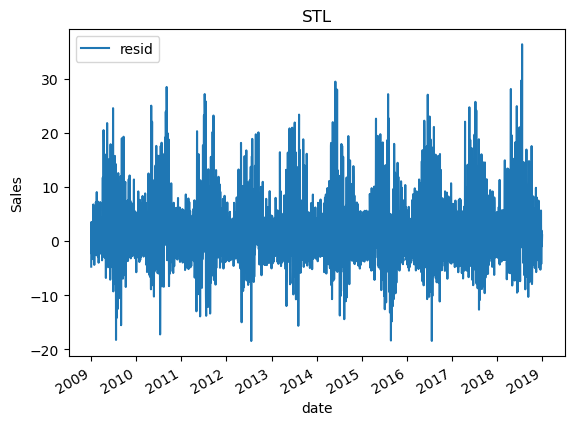

In [26]:
stlr.plot()
plt.title('STL')                            #グラフタイトル
plt.ylabel('Sales') #タテ軸のラベル
plt.xlabel('date')                                #ヨコ軸のラベル
plt.legend()                                       #凡例表示
plt.show()

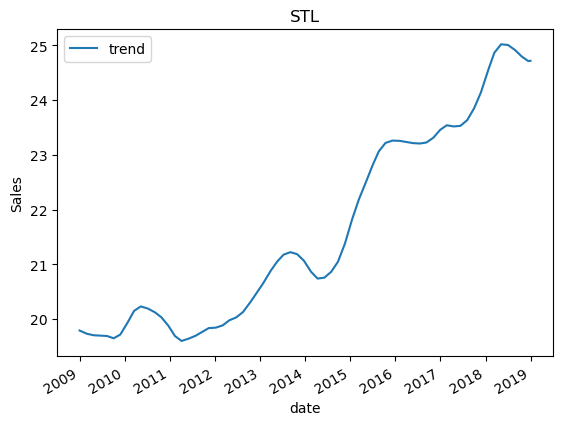

In [27]:
stlt.plot()
plt.title('STL')                            #グラフタイトル
plt.ylabel('Sales') #タテ軸のラベル
plt.xlabel('date')                                #ヨコ軸のラベル
plt.legend()                                       #凡例表示
plt.show()

In [28]:
df_temperature=df_train["temperature_difference_2009_2018"]
df_temperature

date
2009-01-01    0.521429
2009-01-02    1.521429
2009-01-03    0.621429
2009-01-04    1.021429
2009-01-05    1.721429
                ...   
2018-12-27    1.100000
2018-12-28   -3.700000
2018-12-29   -2.300000
2018-12-30   -2.000000
2018-12-31   -3.200000
Name: temperature_difference_2009_2018, Length: 3650, dtype: float64

In [29]:
df_holiday=df_train["holiday"]

In [30]:
holiday_np = np.array(df_holiday, dtype=float)

In [31]:
temperature_np = np.array(df_temperature, dtype=float)
temperature_np

array([ 0.52142857,  1.52142857,  0.62142857, ..., -2.3       ,
       -2.        , -3.2       ])

In [32]:
import numpy as np
import plotly.graph_objects as go

In [33]:
# s_temperature：一つ目の説明変数
x1=temperature_np
x1.shape

(3650,)

In [34]:
#holiday_np:二つ目の説明変数
x2=holiday_np
x2

array([1., 1., 1., ..., 1., 1., 1.])

In [35]:
# stl_r:目的変数
y=stl_r[:365*year]
y.shape

(3650,)

In [36]:
janday=31
febday=janday+28
marday=febday+31
aprday=marday+30
mayday=aprday+31
junday=mayday+30
julday=junday+31
augday=julday+31
sepday=augday+30
octday=sepday+31
novday=octday+30
decday=novday+31

# x1→temperature,x2→holiday

In [37]:
janx1=[]
janx2=[]
jany=[]
i=0
for i in range(year):
    janx1=np.append(janx1,x1[i*365:i*365+janday])
    janx2=np.append(janx2,x2[i*365:i*365+janday])
    jany=np.append(jany,y[i*365:i*365+janday])
    
febx1=[]
febx2=[]
feby=[]
i=0
for i in range(year):
    febx1=np.append(febx1,x1[i*365+janday:i*365+febday])
    febx2=np.append(febx2,x2[i*365+janday:i*365+febday])
    feby=np.append(feby,y[i*365+janday:i*365+febday])
    
marx1=[]
marx2=[]
mary=[]
i=0
for i in range(year):
    marx1=np.append(marx1,x1[i*365+febday:i*365+marday])
    marx2=np.append(marx2,x2[i*365+febday:i*365+marday])
    mary=np.append(mary,y[i*365+febday:i*365+marday])
    
aprx1=[]
aprx2=[]
apry=[]
i=0
for i in range(year):
    aprx1=np.append(aprx1,x1[i*365+marday:i*365+aprday])
    aprx2=np.append(aprx2,x2[i*365+marday:i*365+aprday])
    apry=np.append(apry,y[i*365+marday:i*365+aprday])

mayx1=[]
mayx2=[]
mayy=[]
i=0
for i in range(year):
    mayx1=np.append(mayx1,x1[i*365+aprday:i*365+mayday])
    mayx2=np.append(mayx2,x2[i*365+aprday:i*365+mayday])
    mayy=np.append(mayy,y[i*365+aprday:i*365+mayday])
    
junx1=[]
junx2=[]
juny=[]
i=0
for i in range(year):
    junx1=np.append(junx1,x1[i*365+mayday:i*365+junday])
    junx2=np.append(junx2,x2[i*365+mayday:i*365+junday])
    juny=np.append(juny,y[i*365+mayday:i*365+junday])
    
julx1=[]
julx2=[]
july=[]
i=0
for i in range(year):
    julx1=np.append(julx1,x1[i*365+junday:i*365+julday])
    julx2=np.append(julx2,x2[i*365+junday:i*365+julday])
    july=np.append(july,y[i*365+junday:i*365+julday])
    
augx1=[]
augx2=[]
augy=[]
i=0
for i in range(year):
    augx1=np.append(augx1,x1[i*365+julday:i*365+augday])
    augx2=np.append(augx2,x2[i*365+julday:i*365+augday])
    augy=np.append(augy,y[i*365+julday:i*365+augday])
    
sepx1=[]
sepx2=[]
sepy=[]
i=0
for i in range(year):
    sepx1=np.append(sepx1,x1[i*365+augday:i*365+sepday])
    sepx2=np.append(sepx2,x2[i*365+augday:i*365+sepday])
    sepy=np.append(sepy,y[i*365+augday:i*365+sepday])
    
octx1=[]
octx2=[]
octy=[]
i=0
for i in range(year):
    octx1=np.append(octx1,x1[i*365+sepday:i*365+octday])
    octx2=np.append(octx2,x2[i*365+sepday:i*365+octday])
    octy=np.append(octy,y[i*365+sepday:i*365+octday])
    
novx1=[]
novx2=[]
novy=[]
i=0
for i in range(year):
    novx1=np.append(novx1,x1[i*365+octday:i*365+novday])
    novx2=np.append(novx2,x2[i*365+octday:i*365+novday])
    novy=np.append(novy,y[i*365+octday:i*365+novday])
    
decx1=[]
decx2=[]
decy=[]
i=0
for i in range(year):
    decx1=np.append(decx1,x1[i*365+novday:i*365+decday])
    decx2=np.append(decx2,x2[i*365+novday:i*365+decday])
    decy=np.append(decy,y[i*365+novday:i*365+decday])

In [38]:
col1 = jany
col2 = janx1
col3 = janx2

jandf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})
print(jandf)

        sales  temperature  holiday
0   -4.743821     0.521429      1.0
1    0.809924     1.521429      1.0
2    3.518453     0.621429      1.0
3    2.504832     1.021429      1.0
4   -2.337414     1.721429      0.0
..        ...          ...      ...
305  4.765737    -2.657143      1.0
306  3.398689    -4.457143      1.0
307 -3.065307    -0.257143      0.0
308 -0.778799    -3.357143      0.0
309 -0.524039    -0.757143      0.0

[310 rows x 3 columns]


In [39]:
col1 = feby
col2 = febx1
col3 = febx2
febdf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})

col1 = mary
col2 = marx1
col3 = marx2
mardf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})

col1 = apry
col2 = aprx1
col3 = aprx2
aprdf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})

col1 = mayy
col2 = mayx1
col3 = mayx2
maydf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})

col1 = juny
col2 = junx1
col3 = junx2
jundf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})

col1 = july
col2 = julx1
col3 = julx2
juldf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})

col1 = augy
col2 = augx1
col3 = augx2
augdf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})

col1 = sepy
col2 = sepx1
col3 = sepx2
sepdf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})

col1 = octy
col2 = octx1
col3 = octx2
octdf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})

col1 = novy
col2 = novx1
col3 = novx2
novdf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})

col1 = decy
col2 = decx1
col3 = decx2
decdf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})

In [40]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.formula.api as smf
from scipy.linalg import toeplitz

In [41]:
# ADF検定（原系列）
dftest = adfuller(janx1)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -11.763037
p-value: 0.000000
Critical values :
	 1% -3.45169128009473
	 5% -2.8709394227049154
	 10% -2.5717780602423517


In [42]:
# ADF検定（原系列）
dftest = adfuller(jany)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -6.512103
p-value: 0.000000
Critical values :
	 1% -3.4521902441030963
	 5% -2.871158406898617
	 10% -2.5718948388228586


In [43]:
# 目的変数(Y)
Y = np.array(jandf['sales'])
 
# 説明変数(X)
col_name = ['temperature', 'holiday']
# 全要素が1.0の列を説明変数の先頭に追加(おまじない)
X = sm.add_constant(jandf[col_name])
X = np.array(X)

# モデルの設定(OLS:最小二乗法を指定)
model = sm.OLS(Y, X)
 
# 回帰分析の実行
results = model.fit()
 
# 結果の詳細を表示
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     179.0
Date:                    木, 25 1 2024   Prob (F-statistic):           3.03e-52
Time:                        03:01:29   Log-Likelihood:                -674.11
No. Observations:                 310   AIC:                             1354.
Df Residuals:                     307   BIC:                             1365.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6679      0.155    -10.741      0.0

In [44]:
### 一般化最小二乗法GLSによる回帰分析
# 残差の分散共分散行列の指定方法がテキストと異なるため、結果が合致していない可能性が高い

## パラメータsigma（分散共分散行列）の取得
# ar1_smのOLS残差の１階階差系列をさらにOLS、最小二乗基準を最小化する線形係数ρを取得
ols_resid = smf.ols(formula='sales ~ temperature+holiday ', data=jandf).fit().resid
res_fit = sm.OLS(ols_resid[1:].values, ols_resid[:-1].values).fit()
rho = res_fit.params
# 分散共分散行列に変換
order = toeplitz(np.arange(len(jandf)))  # scipy.linalgのtoeplitz
sigma = rho**order

## 一般化最小二乗法による回帰分析の実行
result_gls = smf.gls(formula='sales ~ temperature+holiday ', data=jandf, sigma=sigma).fit()
# 回帰分析の結果表示
print(result_gls.summary())

                            GLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.535
Model:                            GLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     176.4
Date:                    木, 25 1 2024   Prob (F-statistic):           9.82e-52
Time:                        03:01:29   Log-Likelihood:                -664.23
No. Observations:                 310   AIC:                             1334.
Df Residuals:                     307   BIC:                             1346.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.7309      0.185     -9.369      

In [45]:
janw1=0.1385
janw2=4.8466
janw0=-1.7309

In [46]:
# ADF検定（原系列）
dftest = adfuller(febx1)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -8.018951
p-value: 0.000000
Critical values :
	 1% -3.4540935579190495
	 5% -2.8719934111688965
	 10% -2.5723401594120388


In [47]:
# ADF検定（原系列）
dftest = adfuller(feby)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -3.721577
p-value: 0.003820
Critical values :
	 1% -3.455175292841607
	 5% -2.8724677563219485
	 10% -2.57259315846006


In [48]:
# 目的変数(Y)
Y = np.array(febdf['sales'])
 
# 説明変数(X)
col_name = ['temperature', 'holiday']
# 全要素が1.0の列を説明変数の先頭に追加(おまじない)
X = sm.add_constant(febdf[col_name])
X = np.array(X)

# モデルの設定(OLS:最小二乗法を指定)
model = sm.OLS(Y, X)
 
# 回帰分析の実行
results = model.fit()
 
# 結果の詳細を表示
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     321.8
Date:                    木, 25 1 2024   Prob (F-statistic):           5.78e-73
Time:                        03:01:29   Log-Likelihood:                -555.46
No. Observations:                 280   AIC:                             1117.
Df Residuals:                     277   BIC:                             1128.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5499      0.128    -12.139      0.0

In [49]:
febw1=0.1602
febw2=5.6444
febw0=-1.5499

In [50]:
# ADF検定（原系列）
dftest = adfuller(marx1)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -9.033091
p-value: 0.000000
Critical values :
	 1% -3.45169128009473
	 5% -2.8709394227049154
	 10% -2.5717780602423517


In [51]:
# ADF検定（原系列）
dftest = adfuller(mary)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -2.758365
p-value: 0.064472
Critical values :
	 1% -3.452867117291862
	 5% -2.8714554160827745
	 10% -2.5720532321867466


In [52]:
pdmarx1=pd.DataFrame(marx1)
pdmarx2=pd.DataFrame(marx2)
pdmary=pd.DataFrame(mary)

In [53]:
marx1diff=pdmarx1.diff(1)
marx2diff=pdmarx2.diff(1)
marydiff=pdmary.diff(1)

In [54]:
marx1diff


,0
0,NaN
1,1.6
2,-4.6
3,3.2
4,2.7
...,...
305,0.3
306,0.8
307,1.3
308,-5.8


In [55]:
marx1difff=marx1diff.drop(marx1diff.index[0])
marx2difff=marx2diff.drop(marx2diff.index[0])
marydifff=marydiff.drop(marydiff.index[0])

In [56]:
marx1diff2np=marx1difff.to_numpy()
marx2diff2np=marx2difff.to_numpy()
marydiff2np=marydifff.to_numpy()

In [57]:
marx1diff1np=list(itertools.chain.from_iterable(marx1diff2np))
marx2diff1np=list(itertools.chain.from_iterable(marx2diff2np))
marydiff1np=list(itertools.chain.from_iterable(marydiff2np))

In [58]:
col1 = marydiff1np
col2 = marx1diff1np
col3 = marx2diff1np
mardiffdf = pd.DataFrame({'sales':col1,'temperature':col2, 'holiday':col3})

In [59]:
# ADF検定（原系列）
dftest = adfuller(marydiff1np)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -5.491044
p-value: 0.000002
Critical values :
	 1% -3.4529449243622383
	 5% -2.871489553425686
	 10% -2.572071437887033


In [60]:
# ADF検定（原系列）
dftest = adfuller(marx1diff1np)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -8.182708
p-value: 0.000000
Critical values :
	 1% -3.4524859843440754
	 5% -2.871288184343229
	 10% -2.571964047565425


In [61]:
# ADF検定（原系列）
dftest = adfuller(marx2diff1np)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -9.545621
p-value: 0.000000
Critical values :
	 1% -3.452789844280995
	 5% -2.871421512222641
	 10% -2.5720351510944512


In [62]:

# 目的変数(Y)
Y = np.array(mardiffdf['sales'])
 
# 説明変数(X)
col_name = ['temperature', 'holiday']
# 全要素が1.0の列を説明変数の先頭に追加(おまじない)
X = sm.add_constant(mardiffdf[col_name])
X = np.array(X)

# モデルの設定(OLS:最小二乗法を指定)
model = sm.OLS(Y, X)
 
# 回帰分析の実行
results = model.fit()
 
# 結果の詳細を表示
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     286.2
Date:                    木, 25 1 2024   Prob (F-statistic):           8.47e-71
Time:                        03:01:29   Log-Likelihood:                -768.19
No. Observations:                 309   AIC:                             1542.
Df Residuals:                     306   BIC:                             1554.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0082      0.166      0.050      0.9

In [63]:
### 一般化最小二乗法GLSによる回帰分析
# 残差の分散共分散行列の指定方法がテキストと異なるため、結果が合致していない可能性が高い

## パラメータsigma（分散共分散行列）の取得
# ar1_smのOLS残差の１階階差系列をさらにOLS、最小二乗基準を最小化する線形係数ρを取得
ols_resid = smf.ols(formula='sales ~ temperature+holiday ', data=mardiffdf).fit().resid
res_fit = sm.OLS(ols_resid[1:].values, ols_resid[:-1].values).fit()
rho = res_fit.params
# 分散共分散行列に変換
order = toeplitz(np.arange(len(mardiffdf)))  # scipy.linalgのtoeplitz
sigma = rho**order

## 一般化最小二乗法による回帰分析の実行
result_gls = smf.gls(formula='sales ~ temperature+holiday ', data=mardiffdf, sigma=sigma).fit()
# 回帰分析の結果表示
print(result_gls.summary())

                            GLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.725
Model:                            GLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     403.7
Date:                    木, 25 1 2024   Prob (F-statistic):           1.50e-86
Time:                        03:01:29   Log-Likelihood:                -738.92
No. Observations:                 309   AIC:                             1484.
Df Residuals:                     306   BIC:                             1495.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0093      0.107      0.087      

In [64]:
marw1=0.2563
marw2=7.2812
marw0=0.0093

In [66]:
"""
# 目的変数(Y)
Y = np.array(mardf['sales'])
 
# 説明変数(X)
col_name = ['temperature', 'holiday']
# 全要素が1.0の列を説明変数の先頭に追加(おまじない)
X = sm.add_constant(mardf[col_name])
X = np.array(X)

# モデルの設定(OLS:最小二乗法を指定)
model = sm.OLS(Y, X)
 
# 回帰分析の実行
results = model.fit()
 
# 結果の詳細を表示
print(results.summary())
"""

"\n# 目的変数(Y)\nY = np.array(mardf['sales'])\n \n# 説明変数(X)\ncol_name = ['temperature', 'holiday']\n# 全要素が1.0の列を説明変数の先頭に追加(おまじない)\nX = sm.add_constant(mardf[col_name])\nX = np.array(X)\n\n# モデルの設定(OLS:最小二乗法を指定)\nmodel = sm.OLS(Y, X)\n \n# 回帰分析の実行\nresults = model.fit()\n \n# 結果の詳細を表示\nprint(results.summary())\n"

In [67]:
"""### 一般化最小二乗法GLSによる回帰分析
# 残差の分散共分散行列の指定方法がテキストと異なるため、結果が合致していない可能性が高い

## パラメータsigma（分散共分散行列）の取得
# ar1_smのOLS残差の１階階差系列をさらにOLS、最小二乗基準を最小化する線形係数ρを取得
ols_resid = smf.ols(formula='sales ~ temperature+holiday ', data=mardf).fit().resid
res_fit = sm.OLS(ols_resid[1:].values, ols_resid[:-1].values).fit()
rho = res_fit.params
# 分散共分散行列に変換
order = toeplitz(np.arange(len(mardf)))  # scipy.linalgのtoeplitz
sigma = rho**order

## 一般化最小二乗法による回帰分析の実行
result_gls = smf.gls(formula='sales ~ temperature+holiday ', data=mardf, sigma=sigma).fit()
# 回帰分析の結果表示
print(result_gls.summary())
"""

"### 一般化最小二乗法GLSによる回帰分析\n# 残差の分散共分散行列の指定方法がテキストと異なるため、結果が合致していない可能性が高い\n\n## パラメータsigma（分散共分散行列）の取得\n# ar1_smのOLS残差の１階階差系列をさらにOLS、最小二乗基準を最小化する線形係数ρを取得\nols_resid = smf.ols(formula='sales ~ temperature+holiday ', data=mardf).fit().resid\nres_fit = sm.OLS(ols_resid[1:].values, ols_resid[:-1].values).fit()\nrho = res_fit.params\n# 分散共分散行列に変換\norder = toeplitz(np.arange(len(mardf)))  # scipy.linalgのtoeplitz\nsigma = rho**order\n\n## 一般化最小二乗法による回帰分析の実行\nresult_gls = smf.gls(formula='sales ~ temperature+holiday ', data=mardf, sigma=sigma).fit()\n# 回帰分析の結果表示\nprint(result_gls.summary())\n"

In [68]:
# ADF検定（原系列）
dftest = adfuller(aprx1)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -9.994604
p-value: 0.000000
Critical values :
	 1% -3.4524113009049935
	 5% -2.8712554127251764
	 10% -2.571946570731871


In [69]:
# ADF検定（原系列）
dftest = adfuller(apry)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -3.891310
p-value: 0.002100
Critical values :
	 1% -3.453670163592738
	 5% -2.8718077069772248
	 10% -2.5722411158835796


In [70]:
# 目的変数(Y)
Y = np.array(aprdf['sales'])
 
# 説明変数(X)
col_name = ['temperature', 'holiday']
# 全要素が1.0の列を説明変数の先頭に追加(おまじない)
X = sm.add_constant(aprdf[col_name])
X = np.array(X)

# モデルの設定(OLS:最小二乗法を指定)
model = sm.OLS(Y, X)
 
# 回帰分析の実行
results = model.fit()
 
# 結果の詳細を表示
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     223.1
Date:                    木, 25 1 2024   Prob (F-statistic):           6.88e-60
Time:                        03:03:36   Log-Likelihood:                -821.83
No. Observations:                 300   AIC:                             1650.
Df Residuals:                     297   BIC:                             1661.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4797      0.263     -5.624      0.0

In [71]:
### 一般化最小二乗法GLSによる回帰分析
# 残差の分散共分散行列の指定方法がテキストと異なるため、結果が合致していない可能性が高い

## パラメータsigma（分散共分散行列）の取得
# ar1_smのOLS残差の１階階差系列をさらにOLS、最小二乗基準を最小化する線形係数ρを取得
ols_resid = smf.ols(formula='sales ~ temperature+holiday ', data=aprdf).fit().resid
res_fit = sm.OLS(ols_resid[1:].values, ols_resid[:-1].values).fit()
rho = res_fit.params
# 分散共分散行列に変換
order = toeplitz(np.arange(len(aprdf)))  # scipy.linalgのtoeplitz
sigma = rho**order

## 一般化最小二乗法による回帰分析の実行
result_gls = smf.gls(formula='sales ~ temperature+holiday ', data=aprdf, sigma=sigma).fit()
# 回帰分析の結果表示
print(result_gls.summary())

                            GLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.581
Model:                            GLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     206.0
Date:                    木, 25 1 2024   Prob (F-statistic):           7.80e-57
Time:                        03:03:36   Log-Likelihood:                -811.08
No. Observations:                 300   AIC:                             1628.
Df Residuals:                     297   BIC:                             1639.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.4937      0.319     -4.689      

In [72]:
aprw1=0.4123
aprw2=9.1108
aprw0=-1.4937

In [73]:
# ADF検定（原系列）
dftest = adfuller(mayx1)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -7.342562
p-value: 0.000000
Critical values :
	 1% -3.4518314994261337
	 5% -2.8710009653519166
	 10% -2.571810878948318


In [74]:
# ADF検定（原系列）
dftest = adfuller(mayy)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -2.883273
p-value: 0.047328
Critical values :
	 1% -3.452789844280995
	 5% -2.871421512222641
	 10% -2.5720351510944512


In [75]:
# 目的変数(Y)
Y = np.array(maydf['sales'])
 
# 説明変数(X)
col_name = ['temperature', 'holiday']
# 全要素が1.0の列を説明変数の先頭に追加(おまじない)
X = sm.add_constant(maydf[col_name])
X = np.array(X)

# モデルの設定(OLS:最小二乗法を指定)
model = sm.OLS(Y, X)
 
# 回帰分析の実行
results = model.fit()
 
# 結果の詳細を表示
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     191.2
Date:                    木, 25 1 2024   Prob (F-statistic):           1.17e-54
Time:                        03:03:36   Log-Likelihood:                -947.84
No. Observations:                 310   AIC:                             1902.
Df Residuals:                     307   BIC:                             1913.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0327      0.372     -2.775      0.0

In [76]:
### 一般化最小二乗法GLSによる回帰分析
# 残差の分散共分散行列の指定方法がテキストと異なるため、結果が合致していない可能性が高い

## パラメータsigma（分散共分散行列）の取得
# ar1_smのOLS残差の１階階差系列をさらにOLS、最小二乗基準を最小化する線形係数ρを取得
ols_resid = smf.ols(formula='sales ~ temperature+holiday ', data=maydf).fit().resid
res_fit = sm.OLS(ols_resid[1:].values, ols_resid[:-1].values).fit()
rho = res_fit.params
# 分散共分散行列に変換
order = toeplitz(np.arange(len(maydf)))  # scipy.linalgのtoeplitz
sigma = rho**order

## 一般化最小二乗法による回帰分析の実行
result_gls = smf.gls(formula='sales ~ temperature+holiday ', data=maydf, sigma=sigma).fit()
# 回帰分析の結果表示
print(result_gls.summary())

                            GLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.552
Model:                            GLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     189.0
Date:                    木, 25 1 2024   Prob (F-statistic):           3.15e-54
Time:                        03:03:36   Log-Likelihood:                -932.48
No. Observations:                 310   AIC:                             1871.
Df Residuals:                     307   BIC:                             1882.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.2331      0.463     -2.664      

In [77]:
mayw1=0.9714
mayw2=10.1649
mayw0=-1.2331

In [78]:
# ADF検定（原系列）
dftest = adfuller(junx1)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -10.963805
p-value: 0.000000
Critical values :
	 1% -3.4524113009049935
	 5% -2.8712554127251764
	 10% -2.571946570731871


In [79]:
# ADF検定（原系列）
dftest = adfuller(juny)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -4.345843
p-value: 0.000370
Critical values :
	 1% -3.4535050041524245
	 5% -2.8717352599720294
	 10% -2.5722024776854417


In [80]:
# 目的変数(Y)
Y = np.array(jundf['sales'])
 
# 説明変数(X)
col_name = ['temperature', 'holiday']
# 全要素が1.0の列を説明変数の先頭に追加(おまじない)
X = sm.add_constant(jundf[col_name])
X = np.array(X)

# モデルの設定(OLS:最小二乗法を指定)
model = sm.OLS(Y, X)
 
# 回帰分析の実行
results = model.fit()
 
# 結果の詳細を表示
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     481.7
Date:                    木, 25 1 2024   Prob (F-statistic):           6.04e-94
Time:                        03:03:36   Log-Likelihood:                -822.19
No. Observations:                 300   AIC:                             1650.
Df Residuals:                     297   BIC:                             1661.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6437      0.257     -6.391      0.0

In [81]:
#↑1.824<x<2.176がダービンワトソンで引っかからない範囲
#https://real-statistics.com/statistics-tables/durbin-watson-table/

In [82]:
junw1=0.8170
junw2=13.5884
junw0=-1.6437

In [83]:
# ADF検定（原系列）
dftest = adfuller(julx1)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -6.278738
p-value: 0.000000
Critical values :
	 1% -3.451973573620699
	 5% -2.8710633193086648
	 10% -2.5718441306100512


In [84]:
# ADF検定（原系列）
dftest = adfuller(july)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -4.403555
p-value: 0.000293
Critical values :
	 1% -3.4521175397304784
	 5% -2.8711265007266666
	 10% -2.571877823851692


In [85]:
# 目的変数(Y)
Y = np.array(juldf['sales'])
 
# 説明変数(X)
col_name = ['temperature', 'holiday']
# 全要素が1.0の列を説明変数の先頭に追加(おまじない)
X = sm.add_constant(juldf[col_name])
X = np.array(X)

# モデルの設定(OLS:最小二乗法を指定)
model = sm.OLS(Y, X)
 
# 回帰分析の実行
results = model.fit()
 
# 結果の詳細を表示
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     285.6
Date:                    木, 25 1 2024   Prob (F-statistic):           8.65e-71
Time:                        03:03:36   Log-Likelihood:                -963.87
No. Observations:                 310   AIC:                             1934.
Df Residuals:                     307   BIC:                             1945.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9832      0.375     -5.288      0.0

In [86]:
### 一般化最小二乗法GLSによる回帰分析
# 残差の分散共分散行列の指定方法がテキストと異なるため、結果が合致していない可能性が高い

## パラメータsigma（分散共分散行列）の取得
# ar1_smのOLS残差の１階階差系列をさらにOLS、最小二乗基準を最小化する線形係数ρを取得
ols_resid = smf.ols(formula='sales ~ temperature+holiday ', data=juldf).fit().resid
res_fit = sm.OLS(ols_resid[1:].values, ols_resid[:-1].values).fit()
rho = res_fit.params
# 分散共分散行列に変換
order = toeplitz(np.arange(len(juldf)))  # scipy.linalgのtoeplitz
sigma = rho**order

## 一般化最小二乗法による回帰分析の実行
result_gls = smf.gls(formula='sales ~ temperature+holiday ', data=juldf, sigma=sigma).fit()
# 回帰分析の結果表示
print(result_gls.summary())

                            GLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.623
Model:                            GLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     254.1
Date:                    木, 25 1 2024   Prob (F-statistic):           7.90e-66
Time:                        03:03:36   Log-Likelihood:                -957.15
No. Observations:                 310   AIC:                             1920.
Df Residuals:                     307   BIC:                             1932.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.9894      0.437     -4.550      

In [87]:
julw1=0.9342
julw2=13.7451
julw0=-1.9894

In [88]:
# ADF検定（原系列）
dftest = adfuller(augx1)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -8.315885
p-value: 0.000000
Critical values :
	 1% -3.45169128009473
	 5% -2.8709394227049154
	 10% -2.5717780602423517


In [89]:
# ADF検定（原系列）
dftest = adfuller(augy)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -4.065739
p-value: 0.001103
Critical values :
	 1% -3.452636878592149
	 5% -2.8713543954331433
	 10% -2.5719993576515705


In [90]:

# 目的変数(Y)
Y = np.array(augdf['sales'])
 
# 説明変数(X)
col_name = ['temperature', 'holiday']
# 全要素が1.0の列を説明変数の先頭に追加(おまじない)
X = sm.add_constant(augdf[col_name])
X = np.array(X)

# モデルの設定(OLS:最小二乗法を指定)
model = sm.OLS(Y, X)
 
# 回帰分析の実行
results = model.fit()
 
# 結果の詳細を表示
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     212.2
Date:                    木, 25 1 2024   Prob (F-statistic):           1.32e-58
Time:                        03:03:36   Log-Likelihood:                -941.20
No. Observations:                 310   AIC:                             1888.
Df Residuals:                     307   BIC:                             1900.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8942      0.348     -5.445      0.0

In [91]:
### 一般化最小二乗法GLSによる回帰分析
# 残差の分散共分散行列の指定方法がテキストと異なるため、結果が合致していない可能性が高い

## パラメータsigma（分散共分散行列）の取得
# ar1_smのOLS残差の１階階差系列をさらにOLS、最小二乗基準を最小化する線形係数ρを取得
ols_resid = smf.ols(formula='sales ~ temperature+holiday', data=augdf).fit().resid
res_fit = sm.OLS(ols_resid[1:].values, ols_resid[:-1].values).fit()
rho = res_fit.params
# 分散共分散行列に変換
order = toeplitz(np.arange(len(augdf)))  # scipy.linalgのtoeplitz
sigma = rho**order

## 一般化最小二乗法による回帰分析の実行
result_gls = smf.gls(formula='sales ~ temperature+holiday', data=augdf, sigma=sigma).fit()
# 回帰分析の結果表示
print(result_gls.summary())

                            GLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.569
Model:                            GLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     202.2
Date:                    木, 25 1 2024   Prob (F-statistic):           9.31e-57
Time:                        03:03:36   Log-Likelihood:                -925.91
No. Observations:                 310   AIC:                             1858.
Df Residuals:                     307   BIC:                             1869.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.1148      0.437     -4.837      

In [92]:
augw1=1.0033
augw2=10.9008
augw0=-2.1148

In [93]:
# ADF検定（原系列）
dftest = adfuller(sepx1)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -8.739011
p-value: 0.000000
Critical values :
	 1% -3.4524113009049935
	 5% -2.8712554127251764
	 10% -2.571946570731871


In [94]:
# ADF検定（原系列）
dftest = adfuller(sepy)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -3.767617
p-value: 0.003257
Critical values :
	 1% -3.453670163592738
	 5% -2.8718077069772248
	 10% -2.5722411158835796


In [95]:

# 目的変数(Y)
Y = np.array(sepdf['sales'])
 
# 説明変数(X)
col_name = ['temperature', 'holiday']
# 全要素が1.0の列を説明変数の先頭に追加(おまじない)
X = sm.add_constant(sepdf[col_name])
X = np.array(X)

# モデルの設定(OLS:最小二乗法を指定)
model = sm.OLS(Y, X)
 
# 回帰分析の実行
results = model.fit()
 
# 結果の詳細を表示
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     310.6
Date:                    木, 25 1 2024   Prob (F-statistic):           1.62e-73
Time:                        03:03:36   Log-Likelihood:                -857.84
No. Observations:                 300   AIC:                             1722.
Df Residuals:                     297   BIC:                             1733.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1324      0.305     -6.998      0.0

In [96]:
### 一般化最小二乗法GLSによる回帰分析
# 残差の分散共分散行列の指定方法がテキストと異なるため、結果が合致していない可能性が高い

## パラメータsigma（分散共分散行列）の取得
# ar1_smのOLS残差の１階階差系列をさらにOLS、最小二乗基準を最小化する線形係数ρを取得
ols_resid = smf.ols(formula='sales ~temperature+holiday ', data=sepdf).fit().resid
res_fit = sm.OLS(ols_resid[1:].values, ols_resid[:-1].values).fit()
rho = res_fit.params
# 分散共分散行列に変換
order = toeplitz(np.arange(len(sepdf)))  # scipy.linalgのtoeplitz
sigma = rho**order

## 一般化最小二乗法による回帰分析の実行
result_gls = smf.gls(formula='sales ~ temperature+holiday ', data=sepdf, sigma=sigma).fit()
# 回帰分析の結果表示
print(result_gls.summary())

                            GLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.640
Model:                            GLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     264.0
Date:                    木, 25 1 2024   Prob (F-statistic):           1.29e-66
Time:                        03:03:36   Log-Likelihood:                -848.56
No. Observations:                 300   AIC:                             1703.
Df Residuals:                     297   BIC:                             1714.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.0338      0.364     -5.591      

In [97]:
sepw1=0.7486
sepw2=10.7763
sepw0=-2.0338

In [98]:
# ADF検定（原系列）
dftest = adfuller(octx1)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -5.720047
p-value: 0.000001
Critical values :
	 1% -3.452867117291862
	 5% -2.8714554160827745
	 10% -2.5720532321867466


In [99]:
# ADF検定（原系列）
dftest = adfuller(octy)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -6.576308
p-value: 0.000000
Critical values :
	 1% -3.4521175397304784
	 5% -2.8711265007266666
	 10% -2.571877823851692


In [100]:
# 目的変数(Y)
Y = np.array(octdf['sales'])
 
# 説明変数(X)
col_name = ['temperature', 'holiday']
# 全要素が1.0の列を説明変数の先頭に追加(おまじない)
X = sm.add_constant(octdf[col_name])
X = np.array(X)

# モデルの設定(OLS:最小二乗法を指定)
model = sm.OLS(Y, X)
 
# 回帰分析の実行
results = model.fit()
 
# 結果の詳細を表示
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     392.1
Date:                    木, 25 1 2024   Prob (F-statistic):           2.85e-85
Time:                        03:03:36   Log-Likelihood:                -735.77
No. Observations:                 310   AIC:                             1478.
Df Residuals:                     307   BIC:                             1489.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0699      0.180    -11.518      0.0

In [101]:
### 一般化最小二乗法GLSによる回帰分析
# 残差の分散共分散行列の指定方法がテキストと異なるため、結果が合致していない可能性が高い

## パラメータsigma（分散共分散行列）の取得
# ar1_smのOLS残差の１階階差系列をさらにOLS、最小二乗基準を最小化する線形係数ρを取得
ols_resid = smf.ols(formula='sales ~ temperature+holiday ', data=octdf).fit().resid
res_fit = sm.OLS(ols_resid[1:].values, ols_resid[:-1].values).fit()
rho = res_fit.params
# 分散共分散行列に変換
order = toeplitz(np.arange(len(octdf)))  # scipy.linalgのtoeplitz
sigma = rho**order

## 一般化最小二乗法による回帰分析の実行
result_gls = smf.gls(formula='sales ~ temperature+holiday ', data=octdf, sigma=sigma).fit()
# 回帰分析の結果表示
print(result_gls.summary())

                            GLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.700
Model:                            GLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     357.5
Date:                    木, 25 1 2024   Prob (F-statistic):           6.60e-81
Time:                        03:03:36   Log-Likelihood:                -730.37
No. Observations:                 310   AIC:                             1467.
Df Residuals:                     307   BIC:                             1478.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.0476      0.207     -9.896      

In [102]:
octw1=0.3288
octw2=8.5224
octw0=-2.0476

In [103]:
# ADF検定（原系列）
dftest = adfuller(novx1)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -6.018868
p-value: 0.000000
Critical values :
	 1% -3.453342167806272
	 5% -2.871663828287282
	 10% -2.572164381381345


In [104]:
# ADF検定（原系列）
dftest = adfuller(novy)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -3.292716
p-value: 0.015207
Critical values :
	 1% -3.4535050041524245
	 5% -2.8717352599720294
	 10% -2.5722024776854417


In [105]:
# 目的変数(Y)
Y = np.array(novdf['sales'])
 
# 説明変数(X)
col_name = ['temperature', 'holiday']
# 全要素が1.0の列を説明変数の先頭に追加(おまじない)
X = sm.add_constant(novdf[col_name])
X = np.array(X)

# モデルの設定(OLS:最小二乗法を指定)
model = sm.OLS(Y, X)
 
# 回帰分析の実行
results = model.fit()
 
# 結果の詳細を表示
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     213.3
Date:                    木, 25 1 2024   Prob (F-statistic):           3.78e-58
Time:                        03:03:37   Log-Likelihood:                -695.90
No. Observations:                 300   AIC:                             1398.
Df Residuals:                     297   BIC:                             1409.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6649      0.176     -9.441      0.0

In [106]:
### 一般化最小二乗法GLSによる回帰分析
# 残差の分散共分散行列の指定方法がテキストと異なるため、結果が合致していない可能性が高い

## パラメータsigma（分散共分散行列）の取得
# ar1_smのOLS残差の１階階差系列をさらにOLS、最小二乗基準を最小化する線形係数ρを取得
ols_resid = smf.ols(formula='sales ~ temperature+holiday ', data=novdf).fit().resid
res_fit = sm.OLS(ols_resid[1:].values, ols_resid[:-1].values).fit()
rho = res_fit.params
# 分散共分散行列に変換
order = toeplitz(np.arange(len(novdf)))  # scipy.linalgのtoeplitz
sigma = rho**order

## 一般化最小二乗法による回帰分析の実行
result_gls = smf.gls(formula='sales ~ temperature+holiday ', data=novdf, sigma=sigma).fit()
# 回帰分析の結果表示
print(result_gls.summary())

                            GLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.576
Model:                            GLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     201.7
Date:                    木, 25 1 2024   Prob (F-statistic):           4.64e-56
Time:                        03:03:37   Log-Likelihood:                -691.62
No. Observations:                 300   AIC:                             1389.
Df Residuals:                     297   BIC:                             1400.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.6355      0.199     -8.231      

In [107]:
novw1=0.1680
novw2=5.8984
novw0=-1.6355

In [108]:
# ADF検定（原系列）
dftest = adfuller(decx1)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -7.699053
p-value: 0.000000
Critical values :
	 1% -3.45176116018037
	 5% -2.870970093607691
	 10% -2.571794416006072


In [109]:
# ADF検定（原系列）
dftest = adfuller(decy)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -4.668157
p-value: 0.000097
Critical values :
	 1% -3.4521175397304784
	 5% -2.8711265007266666
	 10% -2.571877823851692


In [110]:

# 目的変数(Y)
Y = np.array(decdf['sales'])
 
# 説明変数(X)
col_name = ['temperature', 'holiday']
# 全要素が1.0の列を説明変数の先頭に追加(おまじない)
X = sm.add_constant(decdf[col_name])
X = np.array(X)

# モデルの設定(OLS:最小二乗法を指定)
model = sm.OLS(Y, X)
 
# 回帰分析の実行
results = model.fit()
 
# 結果の詳細を表示
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     126.3
Date:                    木, 25 1 2024   Prob (F-statistic):           9.24e-41
Time:                        03:03:37   Log-Likelihood:                -737.61
No. Observations:                 310   AIC:                             1481.
Df Residuals:                     307   BIC:                             1492.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5753      0.191     -8.259      0.0

In [111]:

### 一般化最小二乗法GLSによる回帰分析
# 残差の分散共分散行列の指定方法がテキストと異なるため、結果が合致していない可能性が高い

## パラメータsigma（分散共分散行列）の取得
# ar1_smのOLS残差の１階階差系列をさらにOLS、最小二乗基準を最小化する線形係数ρを取得
ols_resid = smf.ols(formula='sales ~temperature+holiday', data=decdf).fit().resid
res_fit = sm.OLS(ols_resid[1:].values, ols_resid[:-1].values).fit()
rho = res_fit.params
# 分散共分散行列に変換
order = toeplitz(np.arange(len(decdf)))  # scipy.linalgのtoeplitz
sigma = rho**order

## 一般化最小二乗法による回帰分析の実行
result_gls = smf.gls(formula='sales ~ temperature+holiday', data=decdf, sigma=sigma).fit()
# 回帰分析の結果表示
print(result_gls.summary())

                            GLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.463
Model:                            GLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     132.1
Date:                    木, 25 1 2024   Prob (F-statistic):           4.02e-42
Time:                        03:03:37   Log-Likelihood:                -727.98
No. Observations:                 310   AIC:                             1462.
Df Residuals:                     307   BIC:                             1473.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.6628      0.225     -7.384      

In [112]:
decw1=0.1783
decw2=5.0903
decw0=-1.6628

In [113]:
df_test

,sales,tokyo_temperature,holiday,Unnamed: 4,temperature_difference_2009_2018,temperature_difference_2019_2021,Unnamed: 7,2009,2010,2011,...,2015,2016,2017,2018,2019,2020,2021,2022,AVERAGE2009-2018,AVERAGE2019-2021
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,31.04,10.7,1,NaN,0.742857,0.133333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,30.79,10.9,1,NaN,0.942857,0.333333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,24.15,10.9,1,NaN,0.942857,0.333333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,16.34,9.8,0,NaN,-0.157143,-0.766667,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-05,19.10,14.0,1,NaN,4.042857,3.433333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,18.54,13.7,0,NaN,1.600000,1.233333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-28,24.99,10.9,1,NaN,-1.200000,-1.566667,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-29,33.16,10.9,1,NaN,-1.200000,-1.566667,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
actual_temperature=df_test["temperature_difference_2009_2018"]
actual_temperature

date
2019-01-01    0.742857
2019-01-02    0.942857
2019-01-03    0.942857
2019-01-04   -0.157143
2019-01-05    4.042857
                ...   
2019-12-27    1.600000
2019-12-28   -1.200000
2019-12-29   -1.200000
2019-12-30   -3.300000
2019-12-31    4.400000
Name: temperature_difference_2009_2018, Length: 365, dtype: float64

In [115]:
actual_temperature_np = np.array(actual_temperature, dtype=float)

In [116]:
actual_holiday=df_test["holiday"]
actual_holiday

date
2019-01-01    1
2019-01-02    1
2019-01-03    1
2019-01-04    0
2019-01-05    1
             ..
2019-12-27    0
2019-12-28    1
2019-12-29    1
2019-12-30    1
2019-12-31    1
Name: holiday, Length: 365, dtype: int64

In [117]:
actual_holiday_np = np.array(actual_holiday, dtype=float)

In [118]:
pred_resid=[]
for i in range(31):
    pred_resid.append(actual_temperature_np[i]*janw1+actual_holiday_np[i]*janw2+janw0)
for i in range(28):
    pred_resid.append(actual_temperature_np[i+janday]*febw1+actual_holiday_np[i+janday]*febw2+febw0)
for i in range(31):
    pred_resid.append(actual_temperature_np[i+febday]*marw1+actual_holiday_np[i+febday]*marw2+marw0)
for i in range(30):
    pred_resid.append(actual_temperature_np[i+marday]*aprw1+actual_holiday_np[i+marday]*aprw2+aprw0)
for i in range(31):
    pred_resid.append(actual_temperature_np[i+aprday]*mayw1+actual_holiday_np[i+aprday]*mayw2+mayw0)
for i in range(30):
    pred_resid.append(actual_temperature_np[i+mayday]*junw1+actual_holiday_np[i+mayday]*junw2+junw0)
for i in range(31):
    pred_resid.append(actual_temperature_np[i+junday]*julw1+actual_holiday_np[i+junday]*julw2+julw0)
for i in range(31):
    pred_resid.append(actual_temperature_np[i+julday]*augw1+actual_holiday_np[i+julday]*augw2+augw0)
for i in range(30):
    pred_resid.append(actual_temperature_np[i+augday]*sepw1+actual_holiday_np[i+augday]*sepw2+sepw0)
for i in range(31):
    pred_resid.append(actual_temperature_np[i+sepday]*octw1+actual_holiday_np[i+sepday]*octw2+octw0)
for i in range(30):
    pred_resid.append(actual_temperature_np[i+octday]*novw1+actual_holiday_np[i+octday]*novw2+novw0)
for i in range(31):
    pred_resid.append(actual_temperature_np[i+novday]*decw1+actual_holiday_np[i+novday]*decw2+decw0)

In [119]:
#pred_resid=[]
#for i in range(365):
   # pred_resid.append(s_actual_temperature[i]*w1+s_actual_holiday[i]*w2+w0)

In [120]:
pred_resids = np.array(pred_resid)
pred_resids.shape

(365,)

In [121]:
time = np.arange(365*year+365, dtype="float32")
time_valid=time[365*year:]
x_valid=stl_r[365*year:]

In [122]:
stl_r.shape

(4015,)

In [123]:
x_valid.shape

(365,)

In [124]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

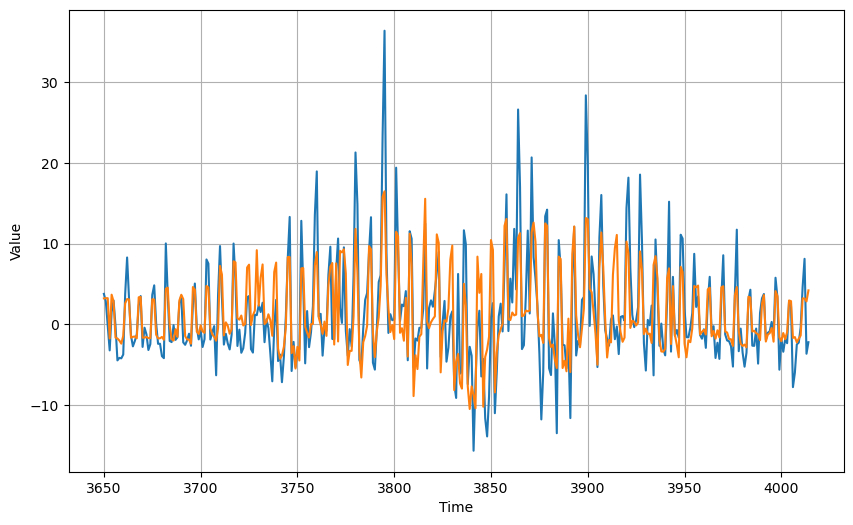

In [125]:
resid_test_pred = np.array(pred_resid[0:])
resid_test_pred.shape

plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, resid_test_pred)

In [126]:
print('RMSE : ',np.sqrt(((x_valid -resid_test_pred )**2).mean()))

RMSE :  4.19263063922351


In [127]:
t_train=stl_t[:year*365]
t_test=stl_t[year*365:]

In [128]:
stl_t.shape

(4015,)

In [129]:
t_test.shape

(365,)

In [130]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  series = tf.expand_dims(series, axis=-1)
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [131]:

series = stl_t
series

array([19.79085011, 19.78981314, 19.78877617, ..., 25.85450747,
       25.85776428, 25.86102108])

In [132]:
df_19=df["2009-01-01":"2019-12-31"]

In [133]:
sales=df_19["sales"]
sales

date
2009-01-01    17.59
2009-01-02    23.83
2009-01-03    22.94
2009-01-04    17.14
2009-01-05    10.32
              ...  
2019-12-27    18.54
2019-12-28    24.99
2019-12-29    33.16
2019-12-30    25.73
2019-12-31    33.84
Name: sales, Length: 4015, dtype: float64

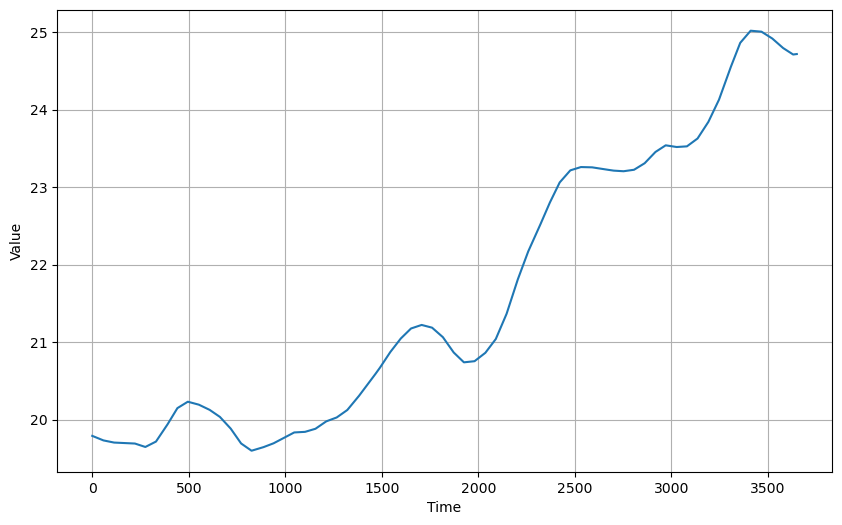

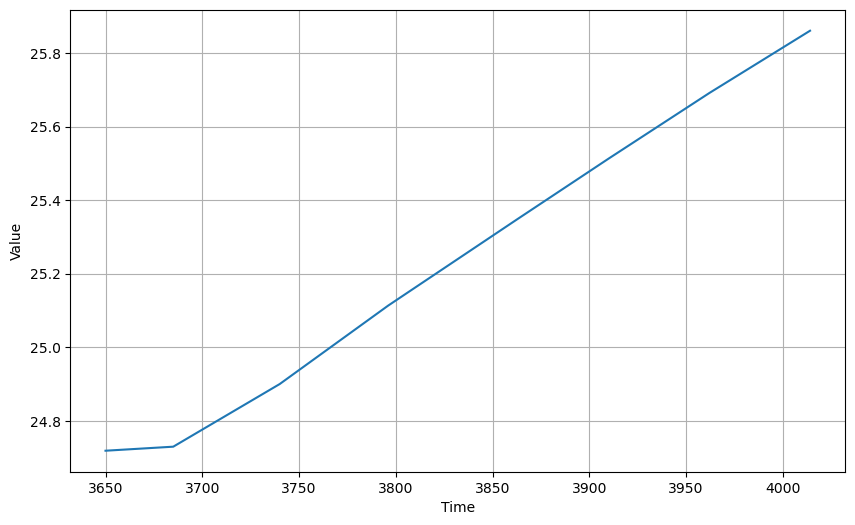

In [134]:
year=10
split_time = 365*year
time = np.arange(365*year+365, dtype="float32")

time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]


window_size = 32
batch_size = 256
shuffle_buffer_size = 4000

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

plt.figure(figsize=(10, 6))
plot_series(time_train, x_train) # 学習セット
plt.show()

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid) # 検証セット
plt.show()


In [135]:
def windowing(df, window_size):
  x = []
  y = []

  for i in range(len(df) - window_size):
    x_result = df[i:i+window_size].to_list()
    x.append(x_result)
    y_result = df[i+window_size]
    y.append(y_result)

  return np.array(x), np.array(y)

In [136]:
sales_train=sales["2009-01-01":"2018-12-31"]
sales_test=sales["2019-01-01":"2019-12-31"]

In [137]:
window_size = 20

x_train_lstm, y_train_lstm = windowing(sales_train, window_size)
x_test_lstm, y_test_lstm = windowing(sales_test,window_size)

In [138]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Bidirectional
from tensorflow.keras.layers import Conv1D

# build lstm model
lstm_model = Sequential()
#lstm_model.add(tf.keras.layers.Bidirectional(LSTM(100, input_shape=(window_size, 1))))
#lstm_model.add(Dense(10))
lstm_model.add(Conv1D(filters=128, kernel_size=3, strides=1, padding='causal', activation='relu', input_shape=[None, 1]))
lstm_model.add(Bidirectional(LSTM(100, activation='relu', input_shape=(window_size,))))
#lstm_model.add(Bidirectional(LSTM(64, return_sequences=True)))
#lstm_model.add(Bidirectional(LSTM(32)))
#lstm_model.add(Dense(1))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
#lstm_model.add(LSTM(100, input_shape=[window_size, 1], return_sequences=True, dropout=0.1, recurrent_dropout=0.5))
#lstm_model.add(LSTM(100, return_sequences=True, dropout=0.1, recurrent_dropout=0.5, activation='relu')) 
#lstm_model.add(Dense(1))
#lstm_model.summary()

In [139]:
from tensorflow.keras.callbacks import EarlyStopping
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3, 
        verbose=1, mode='auto', restore_best_weights=True)

In [140]:
cp = ModelCheckpoint('model/', save_best_only=True)
lstm_model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=RootMeanSquaredError())

In [141]:
# train lstm model
history = lstm_model.fit(tf.expand_dims(x_train_lstm, axis=-1), y_train_lstm, validation_data=(x_test_lstm, y_test_lstm), epochs=50, batch_size=32,verbose=1, callbacks=[cp])

Epoch 1/50
113/114 [============================>.] - ETA: 0s - loss: 99.2473 - root_mean_squared_error: 9.9623  

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


114/114 [==============================] - 9s 55ms/step - loss: 99.0691 - root_mean_squared_error: 9.9533 - val_loss: 53.3078 - val_root_mean_squared_error: 7.3012
Epoch 2/50
114/114 [==============================] - ETA: 0s - loss: 40.8576 - root_mean_squared_error: 6.3920

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


114/114 [==============================] - 6s 53ms/step - loss: 40.8576 - root_mean_squared_error: 6.3920 - val_loss: 40.9268 - val_root_mean_squared_error: 6.3974
Epoch 3/50
113/114 [============================>.] - ETA: 0s - loss: 33.6534 - root_mean_squared_error: 5.8012

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


114/114 [==============================] - 6s 51ms/step - loss: 33.5647 - root_mean_squared_error: 5.7935 - val_loss: 35.1181 - val_root_mean_squared_error: 5.9261
Epoch 4/50
112/114 [============================>.] - ETA: 0s - loss: 30.4780 - root_mean_squared_error: 5.5207

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


114/114 [==============================] - 6s 56ms/step - loss: 30.4611 - root_mean_squared_error: 5.5192 - val_loss: 33.0312 - val_root_mean_squared_error: 5.7473
Epoch 5/50
114/114 [==============================] - 2s 18ms/step - loss: 26.7415 - root_mean_squared_error: 5.1712 - val_loss: 36.2378 - val_root_mean_squared_error: 6.0198
Epoch 6/50
112/114 [============================>.] - ETA: 0s - loss: 25.8643 - root_mean_squared_error: 5.0857

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


114/114 [==============================] - 6s 53ms/step - loss: 25.9131 - root_mean_squared_error: 5.0905 - val_loss: 28.7865 - val_root_mean_squared_error: 5.3653
Epoch 7/50
114/114 [==============================] - 2s 19ms/step - loss: 24.3682 - root_mean_squared_error: 4.9364 - val_loss: 29.2230 - val_root_mean_squared_error: 5.4058
Epoch 8/50
114/114 [==============================] - 2s 19ms/step - loss: 23.2792 - root_mean_squared_error: 4.8249 - val_loss: 30.3265 - val_root_mean_squared_error: 5.5069
Epoch 9/50
112/114 [============================>.] - ETA: 0s - loss: 23.3816 - root_mean_squared_error: 4.8355

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


114/114 [==============================] - 7s 60ms/step - loss: 23.3141 - root_mean_squared_error: 4.8285 - val_loss: 28.3888 - val_root_mean_squared_error: 5.3281
Epoch 10/50
112/114 [============================>.] - ETA: 0s - loss: 22.0339 - root_mean_squared_error: 4.6940

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


114/114 [==============================] - 6s 54ms/step - loss: 21.9508 - root_mean_squared_error: 4.6852 - val_loss: 26.7489 - val_root_mean_squared_error: 5.1719
Epoch 11/50
114/114 [==============================] - 2s 18ms/step - loss: 21.5550 - root_mean_squared_error: 4.6427 - val_loss: 29.8942 - val_root_mean_squared_error: 5.4676
Epoch 12/50
114/114 [==============================] - 2s 21ms/step - loss: 21.8736 - root_mean_squared_error: 4.6769 - val_loss: 27.7157 - val_root_mean_squared_error: 5.2646
Epoch 13/50
114/114 [==============================] - 2s 21ms/step - loss: 21.2436 - root_mean_squared_error: 4.6091 - val_loss: 31.6399 - val_root_mean_squared_error: 5.6249
Epoch 14/50
114/114 [==============================] - 2s 21ms/step - loss: 21.2984 - root_mean_squared_error: 4.6150 - val_loss: 28.0623 - val_root_mean_squared_error: 5.2974
Epoch 15/50
112/114 [============================>.] - ETA: 0s - loss: 21.1661 - root_mean_squared_error: 4.6007

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


114/114 [==============================] - 7s 63ms/step - loss: 21.1728 - root_mean_squared_error: 4.6014 - val_loss: 26.2293 - val_root_mean_squared_error: 5.1215
Epoch 16/50
114/114 [==============================] - 3s 25ms/step - loss: 20.6328 - root_mean_squared_error: 4.5423 - val_loss: 26.3537 - val_root_mean_squared_error: 5.1336
Epoch 17/50
114/114 [==============================] - 3s 27ms/step - loss: 20.8904 - root_mean_squared_error: 4.5706 - val_loss: 29.5546 - val_root_mean_squared_error: 5.4364
Epoch 18/50
114/114 [==============================] - 3s 27ms/step - loss: 21.4484 - root_mean_squared_error: 4.6312 - val_loss: 26.5959 - val_root_mean_squared_error: 5.1571
Epoch 19/50
114/114 [==============================] - 3s 27ms/step - loss: 20.3702 - root_mean_squared_error: 4.5133 - val_loss: 27.0774 - val_root_mean_squared_error: 5.2036
Epoch 20/50
114/114 [==============================] - 3s 27ms/step - loss: 19.5330 - root_mean_squared_error: 4.4196 - val_loss: 31

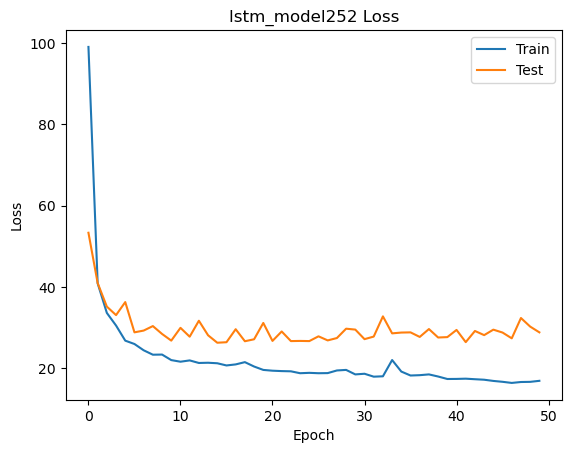

In [142]:
# plot train and test loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('lstm_model252 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

In [143]:
loss_df = pd.DataFrame({'loss': history.history['loss'], 'val_loss': history.history['val_loss']})
loss = pd.DataFrame({'min': loss_df.min(), 'max': loss_df.max()})
loss
print(loss_df.min())

loss        16.331060
val_loss    26.229277
dtype: float64


In [144]:
# load lstm model
from tensorflow.keras.models import load_model
lstm_model = load_model('model/')

In [145]:
train_predictions = lstm_model.predict(x_train_lstm).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train_lstm})
train_results

114/114 [==============================] - 1s 8ms/step


,Train Predictions,Actuals
0,9.805233,7.12
1,8.016216,8.35
2,8.753993,10.68
3,14.623549,14.25
4,14.302687,15.30
...,...,...
3625,16.114643,17.04
3626,16.767324,18.28
3627,22.694521,22.93
3628,25.121809,27.97


In [146]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [147]:
forecast = model_forecast(lstm_model, series[split_time - window_size:-1], window_size)[:,0]

12/12 [==============================] - 3s 254ms/step


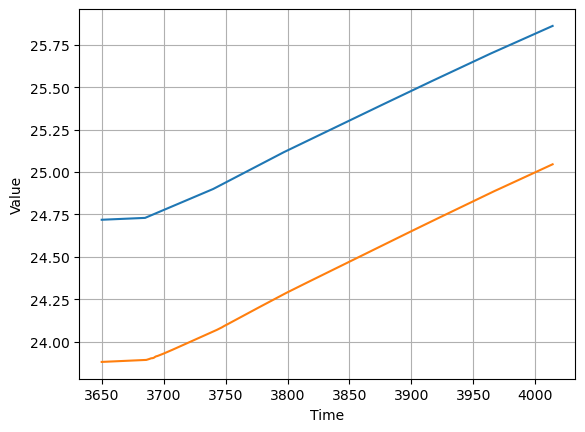

In [148]:
plot_series(time_valid, x_valid)
plot_series(time_valid, forecast)

In [149]:
print('RMSE : ',np.sqrt(((forecast - x_valid)**2).mean()))
mae=mean_absolute_error(x_valid, forecast)
print('MAE : ',mae)

RMSE :  0.8324070991661542
MAE :  0.8323632296969892


In [150]:
trend_test_pred = np.array(forecast)

In [151]:
pred_s=stl_s[:365]
pred_s

array([  2.5429708 ,   3.23026295,  -0.36722933,  -5.15257145,
        -7.12928868,  -9.03908609,  -9.51916376,  -9.81379404,
        -8.23401885,  -9.62787587,  -9.48022992,  -9.7829115 ,
        -9.72140518, -10.45199863, -11.67716578, -10.04440531,
       -10.11046866, -10.43865618, -10.12896566,  -9.83780259,
       -10.68923751, -10.59258637,  -9.40038185, -10.51480436,
        -9.83124755,  -9.87137818,  -9.73153957, -10.75094592,
       -10.62340365, -10.17636535,  -9.34757928,  -8.81862673,
        -9.95767457,  -9.39675694, -10.6009965 ,  -9.87208233,
       -10.67243293,  -8.95897284, -10.57684032, -10.34095104,
        -9.00645536,  -7.67440763, -10.21586388, -10.98557159,
        -9.79937923, -12.20609423, -10.3652562 , -10.41613147,
        -9.72915813, -10.62713931, -10.04904093,  -9.16003532,
        -9.68077652,  -9.50892768,  -9.58824286,  -8.81925929,
        -9.43398839,  -9.26063212,  -8.24788869,  -6.99919777,
        -7.80830382,  -7.21957342, -10.19620766,  -9.42

In [152]:
trend_test_pred.shape

(365,)

In [153]:
resid_test_pred.shape

(365,)

In [154]:
pred_s.shape

(365,)

In [155]:
resid_test_pred.dtype

dtype('float64')

In [156]:
trend_test_pred.dtype

dtype('float32')

In [157]:
pred_s.dtype

dtype('float64')

In [158]:
pred_sales=[]
pred_sales=resid_test_pred+trend_test_pred+pred_s

In [159]:
pred_sales

array([29.64196385, 30.35728979, 26.76011984, 16.97616152, 20.42806662,
       17.687603  , 12.72133813, 12.31623592, 13.64705062, 11.86572166,
       12.98319377, 16.69643644, 17.29842845, 16.52662451, 10.55211635,
       12.29600869, 12.27182151, 11.72236014, 17.11443635, 17.44747749,
       11.54202444, 11.6528403 , 12.92848433, 11.67588416, 12.33206141,
       17.12502219, 17.23747551, 11.85654723, 11.52736756, 11.98859155,
       12.98389806, 13.15817345, 18.35270032, 19.04211556, 13.15499834,
       12.1861282 , 11.20989711, 14.33527251, 11.77453483, 16.52018501,
       18.56200782, 19.36606503, 12.22346191, 11.05837542, 12.23245785,
        9.31478895, 18.18052408, 17.79658002, 13.29026348, 12.10658305,
       13.7610217 , 13.90015432, 13.20631736, 19.18592858, 18.93352527,
       14.62188158, 13.27347306, 13.14568038, 13.68107585, 16.51422069,
       23.3996276 , 22.8895124 , 12.404264  , 14.7901696 , 14.28513549,
       12.84198302, 14.12208257, 20.90815503, 22.39756493, 15.82

In [160]:
actual=df_test["sales"]
actual_sales= np.array(actual)
actual_sales.shape

(365,)

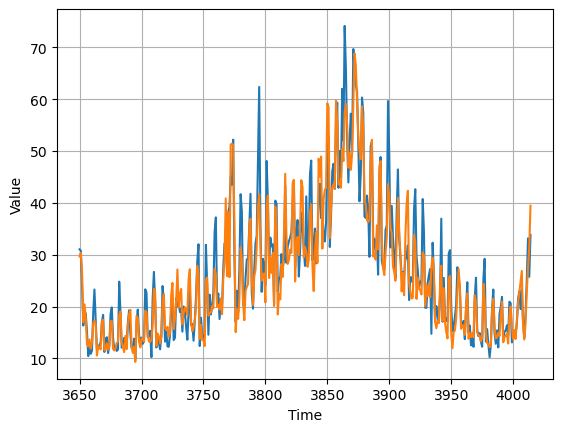

In [161]:
plot_series(time_valid,actual_sales)
plot_series(time_valid, pred_sales)

In [162]:
print('RMSE : ',np.sqrt(((actual_sales - pred_sales)**2).mean()))
mae=mean_absolute_error(actual_sales, pred_sales)
print('MAE : ',mae)

RMSE :  4.2767964265193825
MAE :  3.0621894510443077


In [163]:
%store -r

In [164]:
forecast

array([23.742298 , 26.467682 , 27.575687 , 21.77996  , 17.688858 ,
       21.924732 , 21.691982 , 14.0710745, 15.07745  , 12.805197 ,
       11.191416 , 16.61719  , 19.426708 , 13.893666 , 13.89257  ,
       13.528961 , 12.058835 , 12.417509 , 17.070219 , 19.63639  ,
       14.292637 , 12.016319 , 15.723681 , 14.069753 , 11.747576 ,
       16.927639 , 19.11612  , 12.492435 , 14.750288 , 13.046105 ,
       10.8165455, 12.020328 , 18.353622 , 23.994574 , 10.721375 ,
       12.836227 , 12.560955 , 13.521686 , 13.551417 , 19.951992 ,
       19.006062 , 12.848254 , 15.104027 , 14.998556 , 12.172546 ,
       12.675211 , 16.180622 , 19.35264  , 14.183689 , 11.760242 ,
       13.817998 , 13.31271  , 12.627532 , 17.934856 , 22.330822 ,
       13.358482 , 13.594736 , 14.594072 , 14.374298 , 12.429167 ,
       25.2239   , 25.979988 , 15.7533455, 15.952724 , 15.194665 ,
       13.378487 , 17.744781 , 20.440365 , 21.129963 , 13.702749 ,
       16.405594 , 14.7316265, 12.074993 , 14.5970955, 21.6432

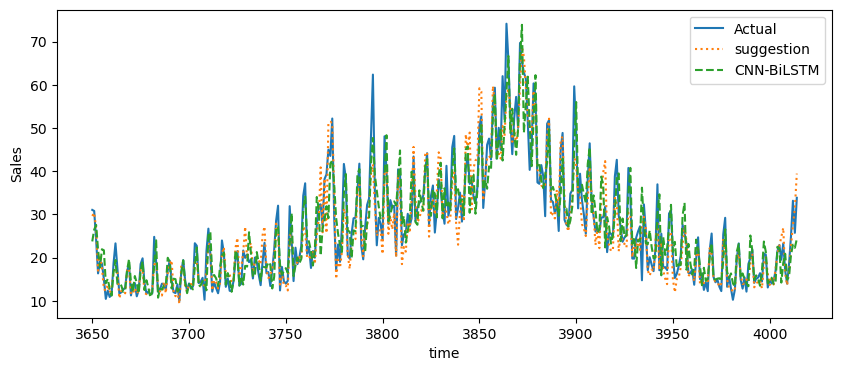

In [165]:
plt.figure(figsize=(10, 4))
plt.plot(time_valid,actual_sales,label='Actual')
plt.plot(time_valid,pred_sales,':',label='suggestion')
plt.plot(time_valid,forecast,'--',label='CNN-BiLSTM')
plt.xlabel('time')
plt.ylabel('Sales')

plt.legend()
plt.show()